<a href="https://colab.research.google.com/github/priyaregit/EDA_Hotel-Booking/blob/main/Hotel_Booking_Analysis_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
# Loading Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Pandas and Numpy libraries for the purpose of data analysis
import pandas as pd
import numpy as np

# Importing Matplotlib and Seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Importing warnings library to filter some warnings
import warnings
warnings.filterwarnings("ignore")

### Let us first read the dataset from Google drive

In [4]:
# Reading the dataset from Google drive and storing it as a dataframe: hotel_booking

hotel_booking = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/EDA/Data/Hotel Bookings.csv')


### We must perform some basic checks on the dataset such as:

* ### Checking the shape of dataframe i.e. number of rows and columns

* ### Checking for the various variables/features of our dataset

* ### Checking the data type of each of the features

* ### Checking for the missing values/ null values

### These checks would give us a baseline understanding of the available data

In [ ]:
# Checking the number of rows and columns in the dataset

hotel_booking.shape

(119390, 32)

In [5]:
# Setting the option to display upto 50 columns of the dataframe
pd.set_option ("display.max_columns", 50)

# Having a look at the first 5 rows/observations from our data
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Checking the last 3 rows from the data

hotel_booking.tail(3)   

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### There are 119,390 rows and 32 columns in the dataset

In [ ]:
# Checking for information such as missing values and data type of all the columns 

hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### We find that there are 4 columns- children, country, agent and company- with missing/null values. We will deal with the issue of missing values a little later.

### We also find that our data is of object, integer and float data types.

### There are 20 columns with numeric data (integer and float data type) and 12 columns with categorical data. 

### However, on closer observation, we notice that the column 'reservation_status_date' which contains dates, is of object data type. We need to change its data type


In [6]:
# Importing datetime module 
from datetime import datetime

# Converting data type of the column 'reservation_status_date' from object to datetime
hotel_booking['reservation_status_date'] =  pd.to_datetime(hotel_booking['reservation_status_date'], format="%Y-%m-%d")


### Let us now have a quick statistical inspection of the numeric data

In [ ]:
# Checking the key statistics of the all the columns with numeric data

hotel_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Some inferences that we can draw from the above statistics are:

* ### The average lead time is 104 days with the maximum being 737 days.

* ### The mean 'adr' is 101.83

* ### The mean of 'days_in_waiting_list' is 2.32 days. However, the maximum waitlist period is 391 days

* ### There seem to be outliers in many of the columns/features.

### We would get a clearer picture of the hotel booking data through data exploration and visualisation of all the individual statistics.

## <b> Data Dictionary

### To assist in data exploration, let us create a Data Dictionary

### First, we need to find the unique values present in all the columns containing categorical data of 'object' type.

In [ ]:
# Creating a list of all the column names
column_names = list(hotel_booking.columns)


# Running a 'for' loop across all the 32 columns and printing the 'unique' values 'if' the column is of object data type
for i in range(len(hotel_booking.columns)):                  

  if hotel_booking.dtypes[column_names[i]] == 'object':    

    print(f"The unique values for {column_names[i]} are: {list(hotel_booking[column_names[i]].unique())}", end = '\n\n')
    

The unique values for hotel are: ['Resort Hotel', 'City Hotel']

The unique values for arrival_date_month are: ['July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June']

The unique values for meal are: ['BB', 'FB', 'HB', 'SC', 'Undefined']

The unique values for country are: ['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LK

In [ ]:
def uni_val(df,col_name):
  a = df.unique()
  b = print(f"The unique values of '{col_name}' are: {a}")
  return b
  

In [ ]:
# Creating a list of all the column names

column_names = list(hotel_booking.columns)


# Running a 'for' loop across all the 32 columns and printing the 'unique' values 'if' the column is of object data type

for i in range(len(hotel_booking.columns)):                  

  if hotel_booking.dtypes[column_names[i]] == 'object':

    uni_val(hotel_booking[column_names[i]],column_names[i])
    print()

The unique values of 'hotel' are: ['Resort Hotel' 'City Hotel']

The unique values of 'arrival_date_month' are: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

The unique values of 'meal' are: ['BB' 'FB' 'HB' 'SC' 'Undefined']

The unique values of 'country' are: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PL

### Now that we know the unique labels in each of the categorical columns, let us understand the information contained in all the columns through a Data Dictionary.

###  The various columns are as follows:

### 1 hotel: It provides information about the type of hotel booked. There are two types of hotels- Resort Hotel and City Hotel

### 2 is_canceled: It indicates if the booking was cancelled. It assigns the value of 1 if the booking is cancelled, else it is assigned 0

### 3 lead_time: It gives the number of days that elapsed between the date of  booking and the arrival date of the guests

### 4 arrival_date_year: It gives the year of the guest's arrival date. We have data for the years 2015, 2016 and 2017

### 5 arrival_date_month: It is a categorical value that gives the month of the guest's arrival date with 12 categories- “January” to “December”

### 6 arrival_date_week_number:	It gives the number of the week of the guest's arrival date. It could range from 1 to 53

### 7 arrival_date_day_of_month: It gives the day of the month on which the guests arrive. It could range from 1 to 31

### 8 stays_in_weekend_nights: It indicates the number of weekend nights (Saturday or Sunday) that the guests stayed or booked to stay at the hotel

### 9 stays_in_week_nights: It indicates the number of week nights (Monday to Friday) that the guests stayed or booked to stay at the hotel

### 10 adults: It shows the number of adults who were booked for a stay at the hotel

### 11 children: It shows the number of children (age group not indicated) who were booked for a stay at the hotel

### 12 babies: It shows the number of babies (age group not indicated) who were booked for a stay at the hotel

### 13 meal: It is a categorical variable that indicates the type of meal booked. Categories present (in accordance with standard hospitality meal packages) are:

 * ### BB – Bed & Breakfast
 * ### HB – Half Board (breakfast and one other meal)
 * ### FB – Full Board (breakfast, lunch and dinner)
 * ### SC/Undefined – no meal package

### 14 country: It indicates the guest's country of origin

### 15 market_segment: It is the designation of the market segment through which the booking was made. The various categories are: Direct, Corporate, Online TA, Offline TA/TO, Complementary, Groups, Aviation and Undefined. Here, the term 'TA' means Travel Agents and 'TO' means Tour Operators

### 16 distribution_channel: It is a categorical	variable indicating the distribution channel through which the booking was made. The various categories are: Direct, Corporate, TA/TO, GDS (Global Distribution System) and Undefined

### 17 is_repeated_guest: It indicates if the booking was made by a repeated guest (1) or not (0)

### 18 previous_cancellations: It gives the number of previous bookings that were cancelled by the customer prior to the current booking

### 19 previous_bookings_not_canceled: It gives the number of previous bookings that were not cancelled by the customer prior to the current booking

### 20 reserved_room_type: It is a categorical	code for the type of room that has been reserved while booking. It may be 'C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P' or 'B'

### 21 assigned_room_type: It is a categorical	code for the type of room assigned to the booking. It may be 'C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L' or 'K'

### 22 booking_changes: It indicates the number of changes made to the booking between the time of booking and the moment of check-in or cancellation

### 23 deposit_type: It gives a categorical indication of the type of deposit made by the customer to confirm the booking. This variable assumes three categories- 'No Deposit', 'Refundable' or 'Non Refund'

### 24 agent: It is a marker for the travel agency that has made the booking
      
### 25 company: It is a marker of the company/entity that has made the booking

### 26 days_in_waiting_list: It gives the number of days the booking was in the waiting list before it was confirmed to the customer

### 27 customer_type: It is a categorical variable that informs about the type of customer. It may be Contract, Group, Transient or Transient-Party

### 28 adr: It is the Average Daily Rate which is a measure of the average revenue that the hotel receives for each occupied guest room per day

### 29 required_car_parking_spaces: It gives the number of car parking spaces required by the customer

### 30 total_of_special_requests: It gives the number of special requests made by the customer (e.g. twin bed or high floor)

### 31 reservation_status: It is a categorical variable indicating the last known status of the reservation. It may be any of the three categories- Check-Out, Canceled or No-Show 

### 32 reservation_status_date: It gives the date on which the reservation_status was last set.		








## <b> Handling Missing Values 


### We have learnt earlier that there are 4 columns with missing values. Let us gather some more information about them


In [7]:
# Creating a function 'missing' to find the missing values in our dataset

def missing():

# Finding the number of missing/null values across all columns in the dataset
  missing_values = hotel_booking.isnull().sum()

# Finding the count of missing values in only those columns which have them
  mis_val_count = missing_values[missing_values > 0]

# Finding the % of missing values in the columns
  mis_val_percent = round(100 * mis_val_count / len(hotel_booking), 2)

# Creating a table with the above information and renaming the column heads
  mis_value_table = pd.concat([mis_val_count, mis_val_percent], axis=1)
  mis_value_table = mis_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Missing'})

# If there are missing values, return the mis_value_table. Else, return that there are no missing values
  if mis_value_table.shape[0] != 0:
    missing_result = mis_value_table
  else:
    missing_result = "There are no missing/null values in the hotel_booking dataset"

  return missing_result

In [ ]:
# Calling the function for missing values

missing()

,Missing Values,% Missing
children,4,0.00
country,488,0.41
agent,16340,13.69
company,112593,94.31


### There are 4 observations in the 'children' column that have missing/null values. 
### We can deal with it in two ways. 
* ### Since they are only four (i.e. insignificant in our dataset) in number, we can remove the rows/observations with missing values for 'children' column. 
* ### Alternatively, we can assign 0 to these observations as the mean value in that column (0.103890) is also nearly 0
### Here, I choose to fill the missing/null observations in the 'children' column with 0



In [8]:
# Filling the missing/null observations in the 'children' column with 0

hotel_booking['children'].fillna(0,inplace = True)

### There are 488 observations in the 'country' column that have missing/null values. 
### We have three options available with us. 
* ### Since values are missing in only 0.41% of the total rows, we may choose to delete such rows. 
* ### 'country' being a categorical column, we may choose to replace the missing values with the most common/ frequently occurring class. 
* ### The third alternative is to simply, replace the missing values with the term "Unknown". 
### Here, I would like to go with the third option. Exercising this option would not influence our dataset in any undue way and will also keep the original message (that the country of origin for these observations is unknown) intact.


In [9]:
# Replacing the missing/null observations in the 'country' column with 'Unknown'

hotel_booking['country'].fillna('Unknown',inplace = True)

### The 'agent' column is a marker for the unique IDs of the travel agency that has made the bookings. There are 16340	observations in the 'agent' column that have missing/null values. This translates to 13.69% of the total observations.

###  We have columns like 'market_segment' and 'distribution_channel' that provide information whether the booking was made by/through an agent. As long as we know that the booking has been made by an agent, it would not matter which agent made the booking. 
### Also, as the 'agent' is coded for reasons of anonymity, we would not be able to gain any useful insight about the most popular agent for booking. 

###  Hence, i would drop the 'agent' column from the dataset

In [10]:
# Dropping the column 'agent' from hotel_booking dataset

hotel_booking.drop('agent', axis = 1, inplace = True)

### We are now left with only the 'company' column with missing/null values in it. 
### A whopping 112,593	rows or 94.31% of the total datset have missing values for the 'company' feature. With so much missing information, we can ignore this column altogether.
### Therefore, i choose to drop the column 'company' from the dataset

In [11]:
# Dropping the column 'company' from hotel_booking dataset

hotel_booking.drop('company', axis = 1, inplace = True)

### Let us quickly reconfirm the handling of missing values.

In [ ]:
# Checking for missing/null values by calling the function for missing values

missing()

'There are no missing/null values in the hotel_booking dataset'

## <b> Dropping unwanted columns

* ### At the outset, there is one column- 'arrival_date_week_number'- that i would like to straightaway drop from the dataset. The information contained in this column would not make any value addition to our dataset. Conclusions about the customer preferences for travel period may be drawn from 'arrival_date_month' column.


* ### 'previous_bookings_not_canceled' and 'is_repeated_guest' point towards smilar information. If it is a repeat guest, then there would be previous bookings that were not cancelled. The number of such previous bookings not cancelled, is immaterial. Hence, i would drop the column 'previous_bookings_not_canceled'

In [12]:
# Dropping 'arrival_date_week_number' and 'previous_bookings_not_canceled' from the dataset

hotel_booking.drop(['arrival_date_week_number','previous_bookings_not_canceled'], axis = 1, inplace = True)


### It feels intutive to have a single column that combines the data for number of children and babies, instead of two separate ones. So, i create a new column 'child' which has the combined data

In [13]:
# Creating a new column 'child' by combining the data from the columns 'children' and 'babies' 
hotel_booking['child'] = hotel_booking['children'] + hotel_booking['babies']

# Dropping 'children' and 'babies' from the dataset
hotel_booking.drop(['children','babies'], axis = 1, inplace = True)


### Also, it would be helpful to know if the guests include children or not. So, I would create a new categorical column: 'if_child' that gives the value of 1 if a child is present and 0 for no children

In [14]:
# Creating a new column 'if_child' with the same values as 'child'
hotel_booking['if_child'] = hotel_booking['child']

# Transforming 'if_child' into a categorical column by assigning 1 to all non zero observations
hotel_booking.loc[hotel_booking.if_child > 0, 'if_child'] = 1

In [15]:
# Creating a new column 'total_guests' by adding the columns 'adults' and 'child' 
hotel_booking['total_guests'] = hotel_booking['adults'] + hotel_booking['child']

# Creating a new column 'total_stay' by adding the columns 'stays_in_weekend_nights' and 'stays_in_week_nights'
hotel_booking['total_stay'] = hotel_booking['stays_in_weekend_nights'] + hotel_booking['stays_in_week_nights']

In [16]:
# Checking the new shape of our dataset

hotel_booking.shape

(119390, 30)

## <b> Outliers' Detection and  Handling 

### Let us draw box plots for various columns to visually check for outliers

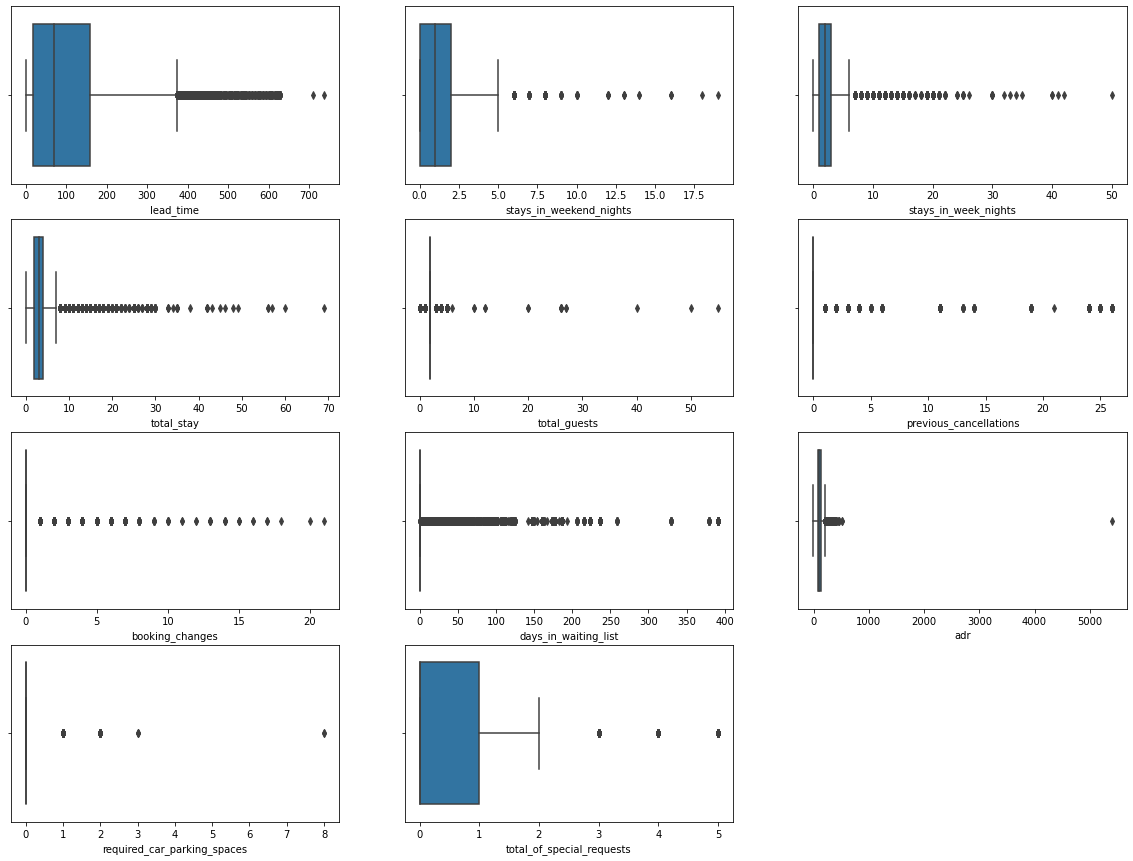

In [17]:
# Creating a list of columns that contain numerical data
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights','total_stay', 'total_guests', 'previous_cancellations', 
            'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests'] 
            
# Setting the display figure size
plt.figure(figsize=(20,15))

n = 1

# Creating boxplots for each of the column/features
for col in columns:
  plt.subplot(4,3,n)
  n = n+1
  sns.boxplot(hotel_booking[col])
  

### I would handle these outliers by assigning a maximum value for all the observations beyond a point.

In [18]:
# Setting a value of 400 to all the observations of 'lead_time' that are greater than 400
hotel_booking.loc[hotel_booking.lead_time > 400, 'lead_time'] = 400

# Setting a value of 10 to all the observations of 'stays_in_weekend_nights' that are greater than 10
hotel_booking.loc[hotel_booking.stays_in_weekend_nights > 10, 'stays_in_weekend_nights'] = 20

# Setting a value of 20 to all the observations of 'stays_in_week_nights' that are greater than 20
hotel_booking.loc[hotel_booking.stays_in_week_nights > 20, 'stays_in_week_nights'] = 20

# Setting a value of 30 to all the observations of 'total_stay' that are greater than 30
hotel_booking.loc[hotel_booking.total_stay > 30, 'total_stay'] = 30

# Setting a value of 20 to all the observations of 'total_guests' that are greater than 20
hotel_booking.loc[hotel_booking.total_guests > 20, 'total_guests'] = 20

# Setting a value of 5 to all the observations of 'previous_cancellations' that are greater than 5
hotel_booking.loc[hotel_booking.previous_cancellations > 5, 'previous_cancellations'] = 5

# Setting a value of 5 to all the observations of 'booking_changes' that are greater than 5
hotel_booking.loc[hotel_booking.booking_changes > 5, 'booking_changes'] = 5

# Setting a value of 200 to all the observations of 'days_in_waiting_list' that are greater than 200
hotel_booking.loc[hotel_booking.days_in_waiting_list > 200, 'days_in_waiting_list'] = 200

# Setting a value of 500 to all the observations of 'adr' that are greater than 500
hotel_booking.loc[hotel_booking.adr > 500, 'adr'] = 500

# Setting a value of 3 to all the observations of 'required_car_parking_spaces' that are greater than 3
hotel_booking.loc[hotel_booking.required_car_parking_spaces > 3, 'required_car_parking_spaces'] = 3


In [19]:
# Creating a copy of the cleaned dataset

df = hotel_booking.copy()

## <b> Data Visualization and Exploration

### Now that we have cleaned our data by handling missing values and outliers, let us explore the data and gain some useful insights about it. 

### I shall start by checking for correlation between the different features of the dataset.

In [20]:
# Creating a new dataframe 'new_df' with some important columns

new_df= hotel_booking[['lead_time','is_canceled','days_in_waiting_list','total_guests','total_stay','booking_changes','previous_cancellations','adr','total_of_special_requests','is_repeated_guest']]


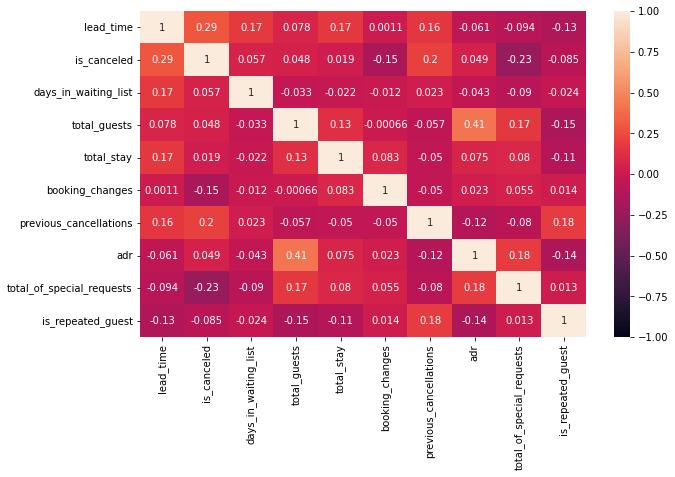

In [31]:
# Creating a heat map of 'new_df' to find correlation 
sns.heatmap(new_df.corr(), vmin=-1, annot = True)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### 'adr' (Average Daily Rate) has the highest correlation (0.41) with 'total_guests'.

### Lead time seems to have some bearing on cancellations.

### Rest of the features in the dataset donot contain very strong correlation between each other.

### I shall now proceed to explore each of the features in the dataset

## <b> Hotel 



### Let us check the number of bookings made in each of the Hotel types.

In [22]:
# Finding the value count of each hotel type

hotel_type = hotel_booking["hotel"].value_counts()

# Printing the count of each hotel type
print("The number of bookings for City Hotels are: ", hotel_type[0], end = '\n\n')
print("The number of bookings for Resort Hotels are: ", hotel_type[1])


The number of bookings for City Hotels are:  79330

The number of bookings for Resort Hotels are:  40060


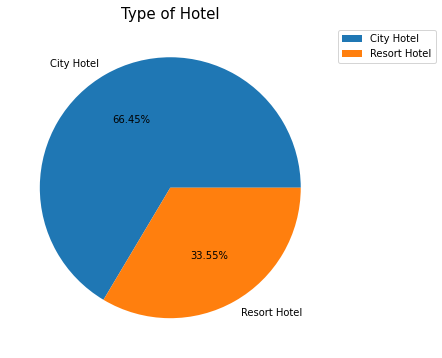

In [23]:
# Plotting a Pie Chart to visualize bookings by hotel_type
p = plt.pie(hotel_type, labels = hotel_type.index, autopct = "%.02f%%")

# Giving a title and legend to the plot
plt.title("Type of Hotel", fontsize = 15)
plt.legend(loc ='centre right', bbox_to_anchor = (1, 0,0, 1))

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

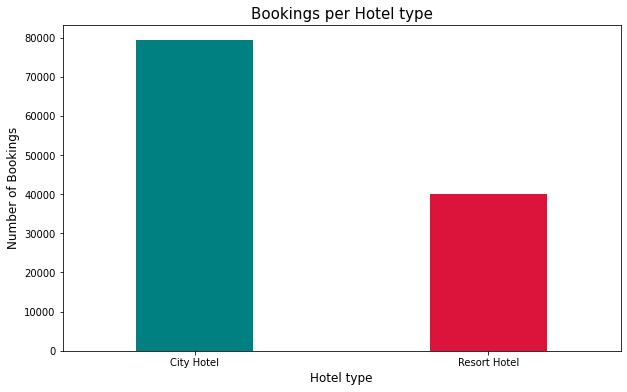

In [24]:
# Bar plot to visualize bookings by hotel_type
hotel_type.plot.bar(width = 0.4, color = ['teal', 'crimson'])

# Giving title and labels to the plot
plt.title('Bookings per Hotel type', fontsize = 15)
plt.ylabel('Number of Bookings', fontsize = 12)
plt.xlabel('Hotel type', fontsize = 12)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### The number of bookings in a City Hotel are roughly twice the number of bookings for Resort Hotels.

###<b> Bookings by Market Segments

In [25]:
# Grouping the dataset by Hotels and finding the normalized count of different Market segments

market_segment_in_hotel = hotel_booking.groupby(['hotel'])['market_segment'].value_counts(normalize = True).unstack()
market_segment_in_hotel

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
hotel,,,,,,,,
City Hotel,0.002988,0.006832,0.037640,0.076806,0.176163,0.211106,0.488441,0.000025
Resort Hotel,NaN,0.005017,0.057639,0.162581,0.145681,0.186520,0.442561,NaN


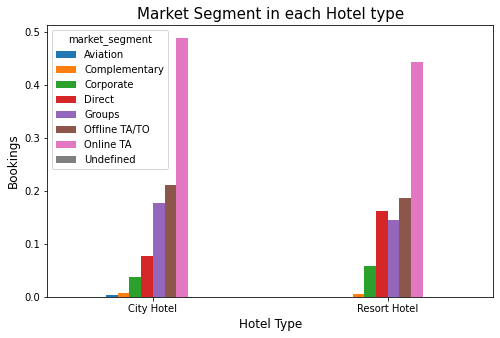

In [28]:
# Bar plot to visualize the Market Segment in each Hotel type
market_segment_in_hotel.plot( kind ='bar', width = 0.4)

# Giving labels and legend to the plot
plt.title('Market Segment in each Hotel type', fontsize = 15)
plt.ylabel('Bookings', fontsize = 12)
plt.xlabel('Hotel Type', fontsize = 12)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (8, 5)

### Resort hotels have a noteworthy (16.2%) contribution of bookings from Direct market segment

### <b> Bookings by Distribution Channel

In [29]:
# Grouping the dataset by Hotels and finding the normalized count of different Disribution Channels

distribution_channel_in_hotel = hotel_booking.groupby(['hotel'])['distribution_channel'].value_counts(normalize = True).unstack()
distribution_channel_in_hotel

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
hotel,,,,,
City Hotel,0.042960,0.085466,0.002433,0.869091,0.000050
Resort Hotel,0.081603,0.196331,NaN,0.722042,0.000025


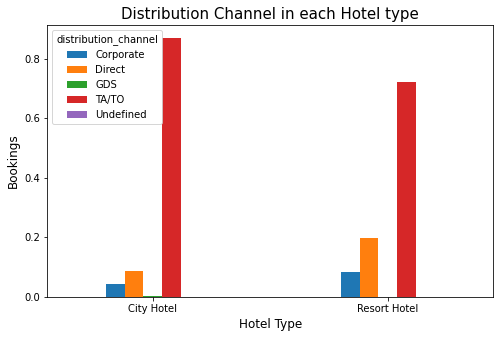

In [30]:
# Bar plot to visualize the Distribution Channel for bookings in each Hotel type
distribution_channel_in_hotel.plot( kind ='bar', width = 0.4)

# Giving labels and legend to the plot
plt.title('Distribution Channel in each Hotel type', fontsize = 15)
plt.ylabel('Bookings', fontsize = 12)
plt.xlabel('Hotel Type', fontsize = 12)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### TA/TO is the biggest distribution channel for both City Hotels and Resort Hotels

###<b> b) Children among guests

### Let us check if the presence of children alters the booking preferences

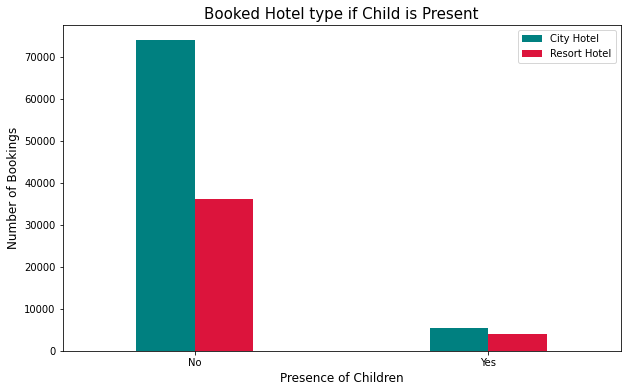

In [33]:
# Applying groupby on 'if_child' and 'hotel' to check the value count of bookings in each hotel type if child is present
hoteltype_ifchild = hotel_booking.groupby(['if_child'])['hotel'].value_counts().unstack()

# Bar plot to visualize bookings in each hotel_type if child is present
hoteltype_ifchild.plot( kind ='bar', width = 0.4, color = ['teal', 'crimson'])

# Giving labels and legend to the plot
plt.title('Booked Hotel type if Child is Present', fontsize = 15)
plt.ylabel('Number of Bookings', fontsize = 12)
plt.xlabel('Presence of Children', fontsize = 12)
plt.legend(['City Hotel', 'Resort Hotel'])
plt.xticks(ticks = [0.0, 1.0], labels = ['No', 'Yes'], rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### We see that when children are present, the number of bookings for City Hotels and Resort Hotels are more equally divided.

### However, if only adults are travelling, the hotel booking preference is clearly in favour of City Hotels

## <b> Booking Cancellations

### Next, let us visualize the number of confirmed bookings and cancelled bookings. 

In [34]:
# Finding the count of booking cancellations
cancellation = hotel_booking['is_canceled'].value_counts()

# Printing the count of booking cancellations
print("The number of bookings that were not cancelled are: ", cancellation[0], end = '\n\n')
print("The number of bookings that were cancelled are: ", cancellation[1])

The number of bookings that were not cancelled are:  75166

The number of bookings that were cancelled are:  44224


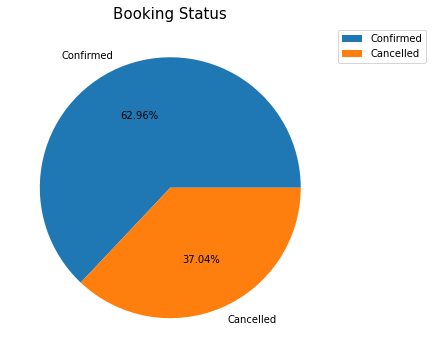

In [35]:
# Plotting a Pie Chart to show bookings are cancelled or confirmed
p = plt.pie(cancellation, labels = ['Confirmed', 'Cancelled'], autopct = "%.02f%%")

# Giving a title and legend to the plot
plt.title("Booking Status", fontsize = 15)
plt.legend(labels = ['Confirmed', 'Cancelled'], loc ='centre right', bbox_to_anchor = (1, 0,0, 1))

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### We see that about 37% of the bookings have been cancelled.
### Let us also check the cancellations vis-a-vis hotel type 

In [36]:
# Grouping the 'hotel' by type and whether the booking 'is_cancelled'

booking_cancelled = hotel_booking.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()
booking_cancelled

is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122


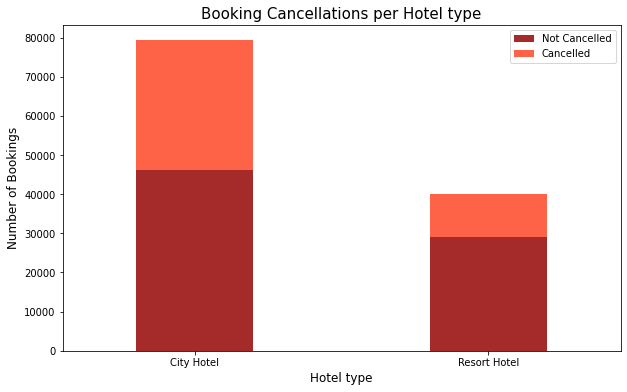

In [37]:
# Stacked Bar plot to visualize booking cancellations by hotel_type
booking_cancelled.plot( kind='bar', stacked=True, width = 0.4, color=['brown', 'tomato'])

# Giving title, labels and legend to the plot
plt.title('Booking Cancellations per Hotel type', fontsize = 15)
plt.ylabel('Number of Bookings', fontsize = 12)
plt.xlabel('Hotel type', fontsize = 12)
plt.legend(['Not Cancelled', 'Cancelled'])
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### From the stacked bar plot, we can clearly infer that the proportion of cancellations were higher in City Hotels as compared to Resort Hotels.

In [ ]:
# Grouping the 'hotel' by type and whether the booking 'is_cancelled'

booking_cancelled = hotel_booking.groupby(['hotel'])['is_canceled'].value_counts(normalize = True).unstack()
booking_cancelled

is_canceled,0,1
hotel,,
City Hotel,0.582730,0.417270
Resort Hotel,0.722366,0.277634


### 41.7% of the bookings were cancelled in City Hotels whereas, for the Resort Hotels, there were about 27.7% cancellations in booking

### Let us also check cancellations per customer type

In [38]:
# Grouping the 'customer' by type and whether the booking 'is_cancelled'

cancelled_by_customer_type = hotel_booking.groupby(['customer_type'])['is_canceled'].value_counts(normalize = True).unstack()
cancelled_by_customer_type 

is_canceled,0,1
customer_type,,
Contract,0.690383,0.309617
Group,0.897747,0.102253
Transient,0.592537,0.407463
Transient-Party,0.745701,0.254299


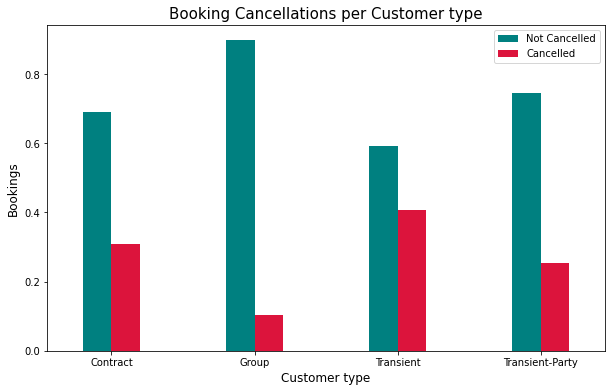

In [40]:
# Bar plot to visualize booking cancellations by customer_type
cancelled_by_customer_type.plot( kind='bar', width = 0.4, color=['teal','crimson'])

# Giving title, labels and legend to the plot
plt.title('Booking Cancellations per Customer type', fontsize = 15)
plt.ylabel('Bookings', fontsize = 12)
plt.xlabel('Customer type', fontsize = 12)
plt.legend(['Not Cancelled', 'Cancelled'])
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### Highest number of cancellations were made by the Transient customers with 40% cancellations.

### Contract customers cancelled 30% of the bookings and Transient-Party customers cancelled 25% of their bookings.

### Group customers made the lowest cancellations at 10%


In [39]:
# Grouping the 'customer_type' and 'hotel_type' and whether the booking 'is_cancelled'

cancelled_by_customer_type_hotel = hotel_booking.groupby(['customer_type','hotel'])['is_canceled'].value_counts(normalize = True).unstack()
cancelled_by_customer_type_hotel

is_canceled                          0         1
customer_type   hotel                           
Contract        City Hotel    0.519565  0.480435
                Resort Hotel  0.911599  0.088401
Group           City Hotel    0.901024  0.098976
                Resort Hotel  0.894366  0.105634
Transient       City Hotel    0.543835  0.456165
                Resort Hotel  0.688305  0.311695
Transient-Party City Hotel    0.719033  0.280967
                Resort Hotel  0.805031  0.194969


### Let us also check cancellations per market segment and distribution channel.

In [41]:
# Grouping the market segment and whether the booking 'is_cancelled'

cancelled_by_market_segment = hotel_booking.groupby(['market_segment'])['is_canceled'].value_counts(normalize = True).unstack()
cancelled_by_market_segment 

is_canceled,0,1
market_segment,,
Aviation,0.780591,0.219409
Complementary,0.869448,0.130552
Corporate,0.812653,0.187347
Direct,0.846581,0.153419
Groups,0.389380,0.610620
Offline TA/TO,0.656840,0.343160
Online TA,0.632789,0.367211
Undefined,NaN,1.000000


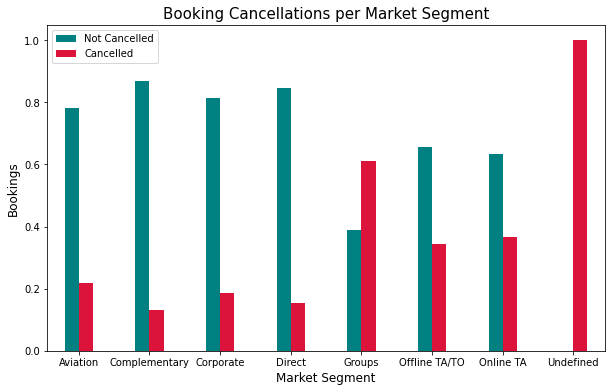

In [42]:
# Bar plot to visualize booking cancellations by market segment
cancelled_by_market_segment.plot( kind='bar', width = 0.4, color=['teal','crimson'])

# Giving title, labels and legend to the plot
plt.title('Booking Cancellations per Market Segment', fontsize = 15)
plt.ylabel('Bookings', fontsize = 12)
plt.xlabel('Market Segment', fontsize = 12)
plt.legend(['Not Cancelled', 'Cancelled'])
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### The cancellations were highest (61%) in the Groups market segment.
### Offline TA/TO and Online TA market segments were responsible for 34% and 37% cancellations respectively
### Direct market segment and Corporate market segment contributed to much lower cancellations at 15% and 18% respectively


In [43]:
# Grouping the distribution channel and whether the booking 'is_cancelled'

cancelled_by_distribution_channel = hotel_booking.groupby(['distribution_channel'])['is_canceled'].value_counts(normalize = True).unstack()
cancelled_by_distribution_channel

is_canceled,0,1
distribution_channel,,
Corporate,0.779242,0.220758
Direct,0.825401,0.174599
GDS,0.808290,0.191710
TA/TO,0.589741,0.410259
Undefined,0.200000,0.800000


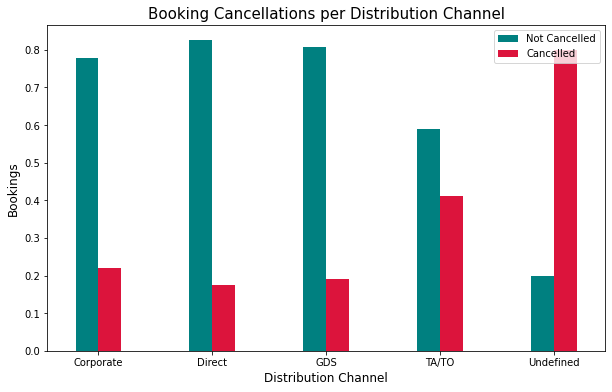

In [44]:
# Bar plot to visualize booking cancellations by distribution channel
cancelled_by_distribution_channel.plot( kind='bar', width = 0.4, color=['teal','crimson'])

# Giving title, labels and legend to the plot
plt.title('Booking Cancellations per Distribution Channel', fontsize = 15)
plt.ylabel('Bookings', fontsize = 12)
plt.xlabel('Distribution Channel', fontsize = 12)
plt.legend(['Not Cancelled', 'Cancelled'])
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### The cancellations were highest (41%) for bookings made through the TA/TO distribution channel.
### Bookings made through the Corporate distribution channel and GDS had 22% and 19% cancellations respectively
### Direct bookings had the least percentage of cancellations at 17%

## <b> Lead Time

### Lead time is the time between the booking date and the arrival date of the guests.
### Let us find the mean lead time for the Hotel bookings

In [45]:
# Grouping the hotels by type to find the mean lead_time for each of the hotel types  

mean_lead_time = hotel_booking.groupby(['hotel'], as_index = False).agg({'lead_time':"mean"}).rename(columns={'lead_time':'mean_lead_time'})
mean_lead_time

,hotel,mean_lead_time
0,City Hotel,108.054229
1,Resort Hotel,92.431503


### We find that the mean lead time for City Hotels (108.05 days) is higher than that of the Resort Hotels (92.43 days). It implies that customers do comparitively more advance booking for City Hotels than Resort Hotels

### On an average, the customers book the Hotels atleast 3 months in advance.

### Let us check the variation in lead time

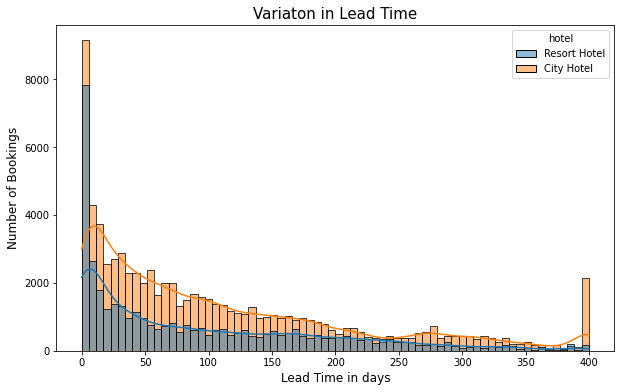

In [48]:
# Plot to check the variation in lead time across hotel types
sns.histplot(x='lead_time', hue = 'hotel', data = hotel_booking, kde = True)

# Giving the title and labels to the plot
plt.title('Variaton in Lead Time', fontsize = 15)
plt.xlabel("Lead Time in days", fontsize = 12)
plt.ylabel("Number of Bookings", fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### The volume of bookings with a shorter lead time is high across both the Hotel types. It looks like the majority of the bookings have a lead time much lower than 100 days 

In [49]:
# Grouping the hotels by type to find the median lead_time for each of the hotel types  

median_lead_time = hotel_booking.groupby(['hotel'], as_index = False).agg({'lead_time':"median"}).rename(columns= {'lead_time':'median_lead_time'})
median_lead_time

,hotel,median_lead_time
0,City Hotel,74.0
1,Resort Hotel,57.0


In [50]:
# Merging the two dataframes 'mean_lead_time' and 'median_lead_time' through right join on 'hotel' type

mean_vs_median_lead_time = pd.merge(mean_lead_time, median_lead_time, how ='right', left_on ='hotel', right_on ='hotel') 
mean_vs_median_lead_time

,hotel,mean_lead_time,median_lead_time
0,City Hotel,108.054229,74.0
1,Resort Hotel,92.431503,57.0


### The median lead time for City Hotels is 74 days and Resort Hotels is 57 days

### Let us check if there is any effect of lead time on cancellations

In [51]:
# Performing groupby operation on 'lead_time' along with the sum(count) of all cancelled bookings and count of hotel bookings
cancelled_per_lead_time = hotel_booking.groupby('lead_time').agg({'is_canceled':'sum', 'hotel':'count'}).reset_index()

# Renaming the columns in the new dataframe 'cancelled_per_lead_time'
cancelled_per_lead_time.rename(columns = {'is_canceled' : 'cancelled_bookings', 'hotel' : 'total_bookings'}, inplace = True)

# Creating a new column 'cancellation_percentage' to store the percentages of cancelled bookings per lead time
cancelled_per_lead_time['cancellation_percentage'] = round((cancelled_per_lead_time['cancelled_bookings'] / cancelled_per_lead_time['total_bookings']) *100, 2)

cancelled_per_lead_time

,lead_time,cancelled_bookings,total_bookings,cancellation_percentage
0,0,430,6345,6.78
1,1,321,3460,9.28
2,2,213,2069,10.29
3,3,182,1816,10.02
4,4,176,1715,10.26
...,...,...,...,...
394,396,18,85,21.18
395,397,1,17,5.88
396,398,33,33,100.00
397,399,1,2,50.00


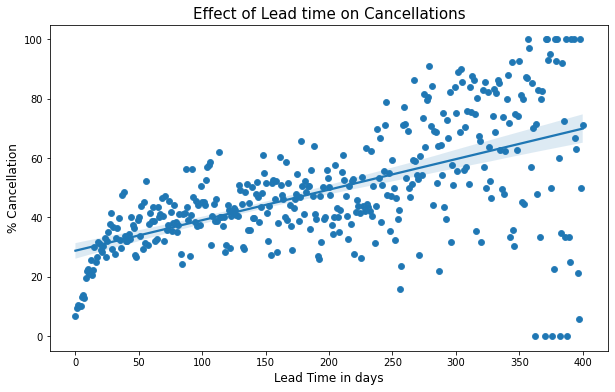

In [52]:
# Drawing a scatterplot showing the cancellation percentage per lead time
sns.scatterplot(x='lead_time', y='cancellation_percentage', data = cancelled_per_lead_time) 

# Plotting a regression line for the given data
sns.regplot(x='lead_time', y='cancellation_percentage', data = cancelled_per_lead_time)

# Giving title and labels to the plot
plt.title("Effect of Lead time on Cancellations", fontsize = 15)
plt.xlabel("Lead Time in days", fontsize = 12)
plt.ylabel("% Cancellation", fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### The above plot shows a clear positive correlation between lead time and cancellations of bookings. Bookings having less lead time are less often cancelled whereas bookings with high lead time are more often cancelled..

## <b> Arrival Date, Month and Year

### Let us check the details of the travel period for which the Hotel bookings have been made.

In [53]:
# Checking the travel period by grouping the months and years and taking a count

hotel_booking.groupby('arrival_date_month')['arrival_date_year'].value_counts().unstack()


arrival_date_year,2015,2016,2017
arrival_date_month,,,
April,NaN,5428.0,5661.0
August,3889.0,5063.0,4925.0
December,2920.0,3860.0,NaN
February,NaN,3891.0,4177.0
January,NaN,2248.0,3681.0
July,2776.0,4572.0,5313.0
June,NaN,5292.0,5647.0
March,NaN,4824.0,4970.0
May,NaN,5478.0,6313.0


### The dataset contains booking information from July 2015 till August 2017.


In [54]:
# Grouping the 'hotel' by type and 'arrival_date_year'

booking_year = hotel_booking.groupby(['arrival_date_year','hotel'])['hotel'].count().unstack()
booking_year


hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,13682,8314
2016,38140,18567
2017,27508,13179


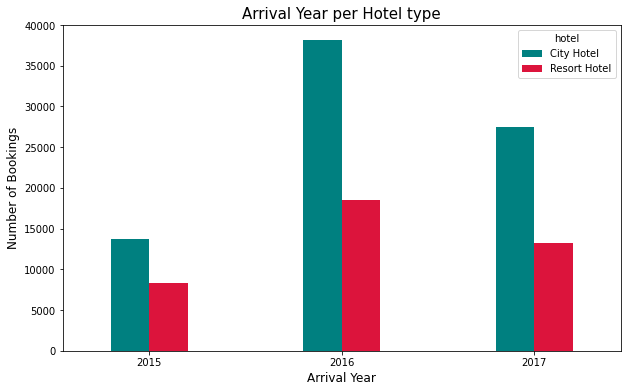

In [55]:
# Bar plot to visualize 'arrival_date_year' by hotel_type
booking_year.plot.bar(width = 0.4, color=['teal', 'crimson'])

# Giving title and labels to the plot
plt.title('Arrival Year per Hotel type', fontsize = 15)
plt.ylabel('Number of Bookings', fontsize = 12)
plt.xlabel('Arrival Year', fontsize = 12)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


###  The above graph shows the arrivals during the last 6 months of the year 2015, entire year of 2016 and the first 8 months of 2017


### Let us check the number of bookings across the months in a year.


### 2015 and 2017 have booking data only for a few months. So, for the purpose of checking the variation in hotel booking across months (alone), let us consider the data only for the year 2016.

In [56]:
## Creating a subset of the original dataframe containing only the observations from the full year 2016

df_2016 = hotel_booking[hotel_booking['arrival_date_year'] == 2016]


In [57]:
# Giving an order of months
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Finding the value count of 'arrival_date_month' and sorting the index by months
booking_month = df_2016["arrival_date_month"].value_counts().reindex(months)

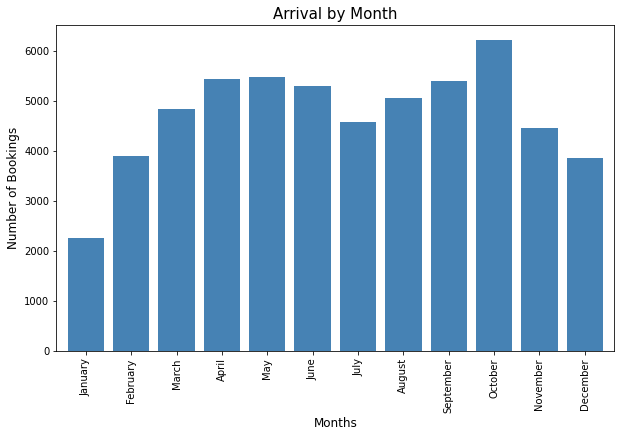

In [58]:
# Bar plot to visualize bookings by 'arrival_date_month' 
booking_month.plot.bar(width = 0.8, color = ['steelblue'])

# Giving title and labels to the plot
plt.title('Arrival by Month', fontsize = 15)
plt.ylabel('Number of Bookings', fontsize = 12)
plt.xlabel('Months', fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### The highest number of hotel bookings is for the month of October.
### There is high demand for hotel booking during the summer months from April-June and again in September -October
### There is a slight dip in demand in the months of July and August
### There are lower bookings for the period November - February



In [59]:
# Grouping the 'hotel' by type and 'arrival_date_month' and finding the count of such bookings
booking_month_by_hotel = df_2016.groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()

# Arranging the months in sequential order
booking_month_by_hotel = booking_month_by_hotel.reindex(months)


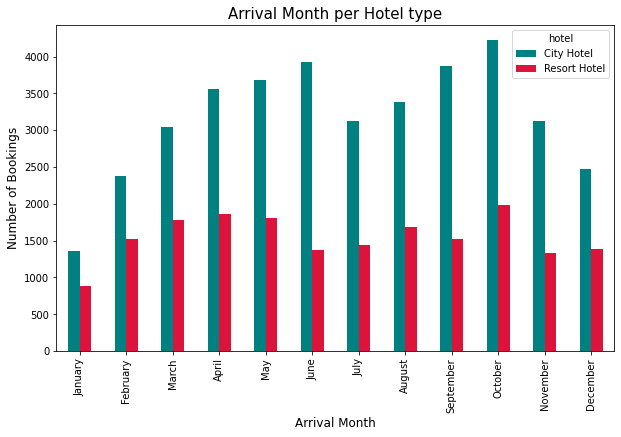

In [60]:
# Bar plot to visualize 'arrival_date_month' by hotel_type
booking_month_by_hotel.plot.bar(color=['teal', 'crimson'])

# Giving title and labels to the plot
plt.title('Arrival Month per Hotel type', fontsize = 15)
plt.ylabel('Number of Bookings', fontsize = 12)
plt.xlabel('Arrival Month', fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### There is a pronounced dip in bookings of City hotels in the month of July, before it picks up again to reach a peak in October

### Along with the winter months of November - December, the Resort hotels also have lower bookings during mid-year period

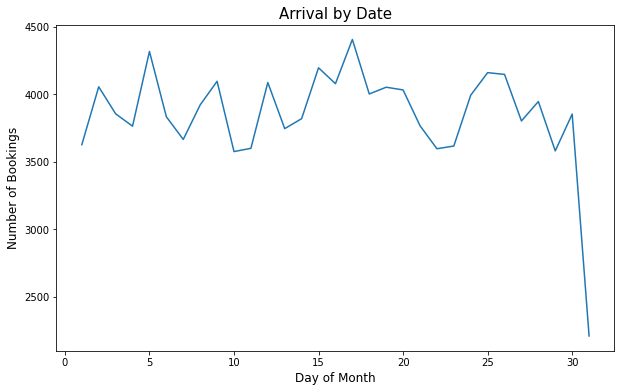

In [61]:
# Grouping the bookings by 'arrival_date_day_of_month'
booking_date = hotel_booking.groupby('arrival_date_day_of_month')['arrival_date_day_of_month'].count()

# A simple line plot to visualize bookings by 'arrival_date_day_of_month'
booking_date.plot()

# Giving title and labels to the plot
plt.title('Arrival by Date', fontsize = 15)
plt.ylabel('Number of Bookings', fontsize = 12)
plt.xlabel('Day of Month', fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### It seems like the guests do not have any specific preference for travel dates in a month

## <b> Country

### Now, let us find the country of origin of the guests

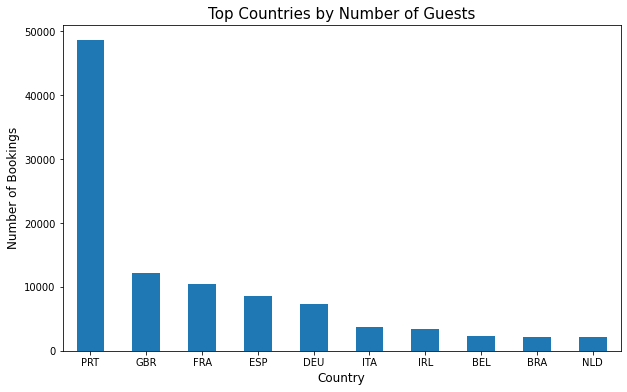

In [65]:
# Finding top 10 countries by number of guest bookings

# Finding the count for each of the unique values in 'country' column and arranging it in descending order
top_countries = hotel_booking['country'].value_counts().sort_values(ascending=False)[:10]

# Bar plot to visualize number of bookings made by top 10 countries
top_countries.plot.bar(width = 0.5)

# Giving title and labels to the plot
plt.title('Top Countries by Number of Guests', fontsize = 15)
plt.ylabel('Number of Bookings', fontsize = 12)
plt.xlabel('Country', fontsize = 12)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### The countries of origin of the highest number of guests' are:
* ### Portugal [PRT]
* ### Great Britain [GBR]
* ### France [FRA]
* ### Spain [ESP]
* ### Germany [DEU]

### Let us check the type of hotel booked by the guests belonging to the top 10 countries (by booking)

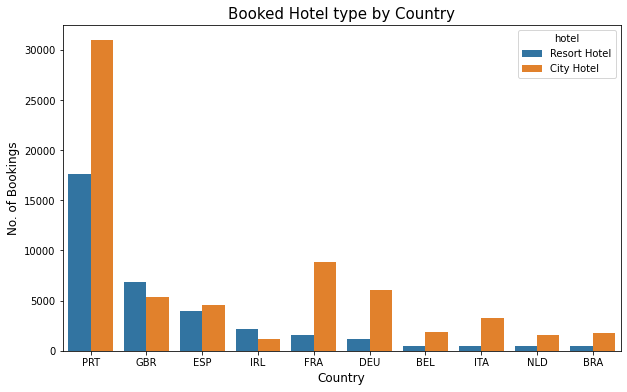

In [66]:
# Bar plot to visualize type of hotel bookings made by guests belonging to top 10 countries
sns.countplot(x ='country', hue ='hotel', data = hotel_booking [hotel_booking['country'].isin(top_countries.index)] )

# Giving title and labels to the plot
plt.xlabel("Country", fontsize = 12)
plt.ylabel("No. of Bookings", fontsize = 12)
plt.title("Booked Hotel type by Country", fontsize = 15)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### The general trend is that more guests prefered to book City Hotels rather than Resort Hotels.

### Among the top 10 countries by booking, only the guests belonging to Great Britain and Ireland have preferred to book Resort hotels over City Hotels

### Guests from France, Germany, Portugal and Italy have overwhelmingly chosen City Hotels over Resort Hotels

## <b> Market Segment

### Next, let us check bookings by Market Segment

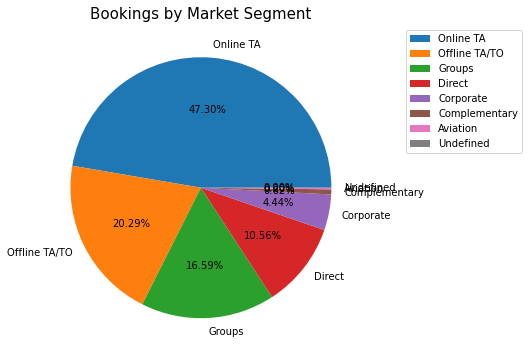

In [72]:
# Finding the value count of the unique values in 'market_segment'
booking_market_segment = hotel_booking['market_segment'].value_counts()

# Plotting a Pie Chart to show bookings by various market segments
plt.pie(booking_market_segment, labels = booking_market_segment.index, autopct = "%.02f%%")

# Giving a title and legend to the plot
plt.title("Bookings by Market Segment", fontsize = 15)
plt.legend(loc ='top right', bbox_to_anchor = (1, 0, 0.5, 1))

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### About half the number of total bookings by market segment are made by the Online Travel Agents

### The highest number of bookings by market segment are made through:

* ### Online TA      (47%)
* ### Offline TA/TO  (20%)
* ### Groups         (17%)

### Together they constitute 84% of the total bookings

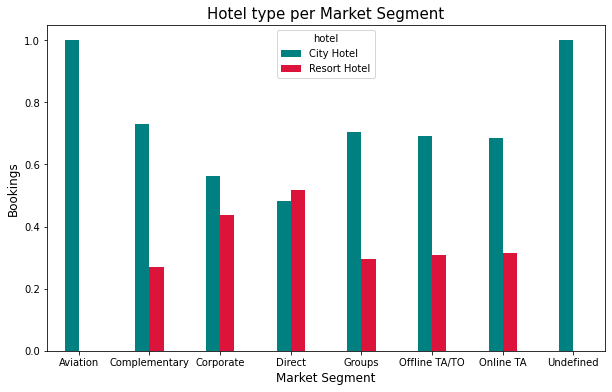

In [68]:
# Applying groupby to group the Hotels based on Market Segment
hotel_type_by_market_segment = hotel_booking.groupby(['market_segment'])['hotel'].value_counts(normalize = True).unstack()

# Bar plot to visualize the type of hotel booked by market segment
hotel_type_by_market_segment.plot( kind ='bar', width = 0.4, color = ['teal', 'crimson'])

# Giving labels and legend to the plot
plt.title('Hotel type per Market Segment', fontsize = 15)
plt.ylabel('Bookings', fontsize = 12)
plt.xlabel('Market Segment', fontsize = 12)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

In [69]:
# Finding normalized value count of bookings made in hotel by each market segment
hotel_booking.groupby(['market_segment'])['hotel'].value_counts(normalize = True).unstack()

hotel,City Hotel,Resort Hotel
market_segment,,
Aviation,1.000000,NaN
Complementary,0.729475,0.270525
Corporate,0.563928,0.436072
Direct,0.483341,0.516659
Groups,0.705416,0.294584
Offline TA/TO,0.691482,0.308518
Online TA,0.686085,0.313915
Undefined,1.000000,NaN


### Resort Hotels had a higher share (52%) than City Hotels (48%) in only the Direct market segment

### In rest of the Market segments, City Hotels had a higher share

### City Hotels have a majority share (approx 70%) in the Offline TA/TO, Online TA, Complementary and Groups market segments.

### The Corporate market segment's bookings were divided between City and Resort hotels in the ratio 56% to 44%


## <b> Distribution Channel

### Let us also check bookings by Distribution Channel

In [70]:
# Finding the value count of the unique values in 'distribution_channel'

booking_distribution_channel = hotel_booking['distribution_channel'].value_counts()
booking_distribution_channel

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

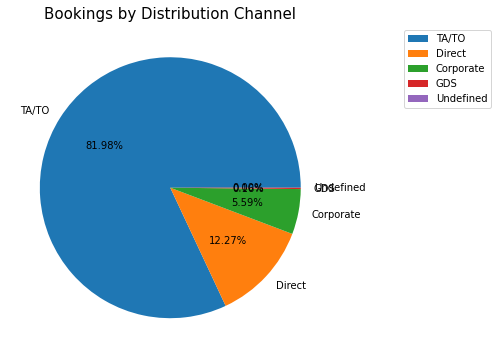

In [71]:
# Plotting a Pie Chart to show bookings made through various distribution channels
plt.pie(booking_distribution_channel, labels = booking_distribution_channel.index, autopct = "%.02f%%")

# Giving a title and legend to the plot
plt.title("Bookings by Distribution Channel", fontsize = 15)
plt.legend(loc ='top right', bbox_to_anchor = (1, 0, 0.5, 1))

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### Majority of bookings (82%) were done through the distribution channels of TA/TO (travel agents and tour operators).



## <b> Customer type

### Let us check the Customer type for the bookings

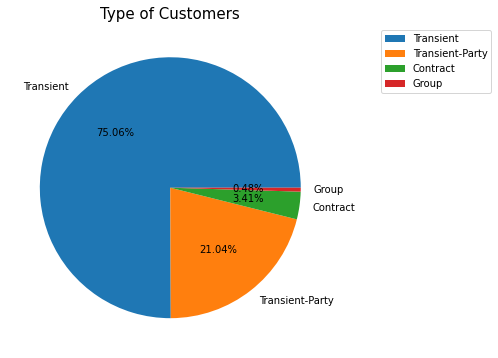

In [73]:
# Finding the value count of the unique values in 'customer_type'
cust_type = hotel_booking['customer_type'].value_counts()

# Plotting a Pie Chart to show bookings made by each customer type
plt.pie(cust_type, labels = cust_type.index, autopct = "%.02f%%")

# Giving a title and legend to the plot
plt.title("Type of Customers", fontsize = 15)
plt.legend(loc ='top right', bbox_to_anchor = (1, 0, 0.5, 1))

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### The majority (96%) of the bookings  were made by Transient (75%) and Transient-Party (21%) customers. Transient travellers can include walk-in guests, guests with a last-minute booking or simply individual guests requiring a short stay at the hotel


### Let us check the type of Hotel booked based on Customer type

In [74]:
# Applying groupby to group the hotels based on type of customers

hotel_type_by_customer = hotel_booking.groupby(['customer_type'])['hotel'].value_counts(normalize =True).unstack()
hotel_type_by_customer

hotel,City Hotel,Resort Hotel
customer_type,,
Contract,0.564279,0.435721
Group,0.507799,0.492201
Transient,0.662895,0.337105
Transient-Party,0.689898,0.310102


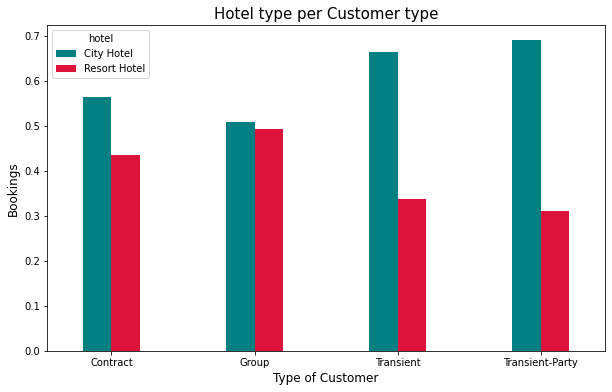

In [75]:
# Bar plot to visualize the type of hotel booked by customer type
hotel_type_by_customer.plot( kind ='bar', width = 0.4, color = ['teal', 'crimson'])

# Giving labels and legend to the plot
plt.title('Hotel type per Customer type', fontsize = 15)
plt.ylabel('Bookings', fontsize = 12)
plt.xlabel('Type of Customer', fontsize = 12)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### 2 out of 3 Transient customers have chosen City Hotels over Resort Hotels

### 43% of Customers of contract type and 31% of the Transient-Party customers have made bookings in Resort Hotels

### Group customers had a nearly equal preference for City Hotels and Resort Hotels









## <b> Deposit type

### Let us check bookings based on deposit types

In [76]:
# Checking the value count of each deposit type

booking_deposit = hotel_booking['deposit_type'].value_counts()
booking_deposit

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

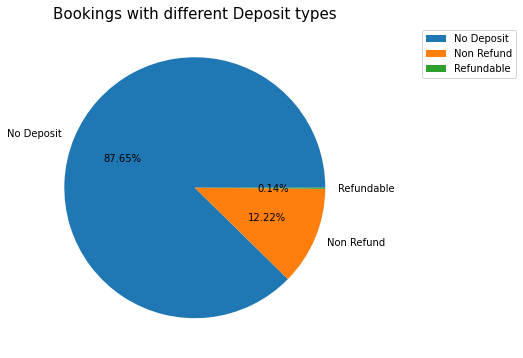

In [77]:
# Plotting a Pie Chart to show different deposit types used to make bookings
plt.pie(booking_deposit, labels = booking_deposit.index, autopct = "%.02f%%")

# Giving a title and legend to the plot
plt.title("Bookings with different Deposit types", fontsize = 15)
plt.legend(loc ='top right', bbox_to_anchor = (1, 0, 0.5, 1))

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### While majority (88%) of the bookings were made without any deposit, about 12% of the bookings required deposits that were non-refundable

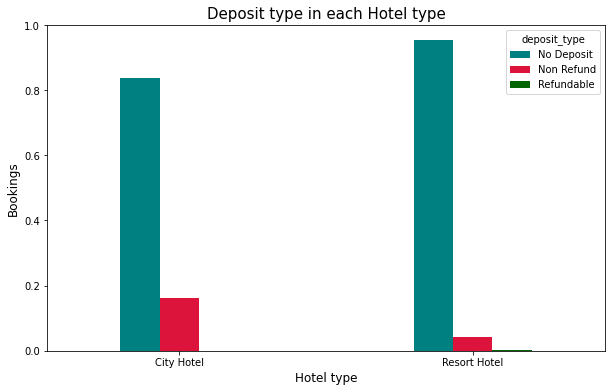

In [78]:
# Applying groupby to group the hotels based on deposit type
deposit_type_by_hotel = hotel_booking.groupby(['hotel'])['deposit_type'].value_counts(normalize = True).unstack()

# Bar plot to visualize the type of deposits in each hotel type
deposit_type_by_hotel.plot( kind ='bar', width = 0.4, color = ['teal', 'crimson','darkgreen'])

# Giving labels and legend to the plot
plt.title('Deposit type in each Hotel type', fontsize = 15)
plt.ylabel('Bookings', fontsize = 12)
plt.xlabel('Hotel type', fontsize = 12)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

In [79]:
# Printing deposit_type_by_hotel

deposit_type_by_hotel

deposit_type,No Deposit,Non Refund,Refundable
hotel,,,
City Hotel,0.837539,0.162208,0.000252
Resort Hotel,0.953545,0.042911,0.003545


### 16.22% of the bookings in City Hotels were made with Non Refundable deposits while only 4.3% of the bookings in Resort Hotels required such deposits.

### Let us check if there is any relation between deposit type and cancellations

In [80]:
# Applying groupby to group the deposit types and check for cancellations

cancelled_by_deposit = hotel_booking.groupby('deposit_type')['is_canceled'].value_counts(normalize = True).unstack()
cancelled_by_deposit

is_canceled,0,1
deposit_type,,
No Deposit,0.716230,0.283770
Non Refund,0.006376,0.993624
Refundable,0.777778,0.222222


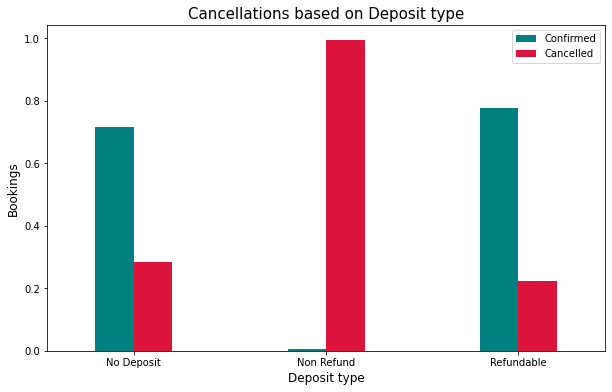

In [81]:
# Bar plot to visualize the booking cancellations per deposit type
cancelled_by_deposit.plot( kind ='bar', width = 0.4, color = ['teal', 'crimson','darkgreen'])

# Giving labels and legend to the plot
plt.title('Cancellations based on Deposit type', fontsize = 15)
plt.ylabel('Bookings', fontsize = 12)
plt.xlabel('Deposit type', fontsize = 12)
plt.xticks(rotation = 'horizontal')
plt.legend(labels = ['Confirmed','Cancelled'])

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### Contrary to expectations, bookings made with non-refundable deposits had about 99% cancellations.

### Bookings made without any deposit had 28% cancellations and bookings made with refundable deposits had 22% cancellations

## <b> Meal type

### Let us see the details of bookings that have been made along with the provision of meals and the various meal types on offer.

In [82]:
# Finding the value count of the unique values in 'meal'

meal_type = hotel_booking['meal'].value_counts()
meal_type

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

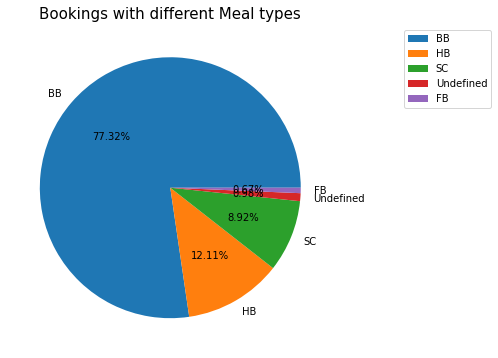

In [83]:
# Plotting a Pie Chart to show bookings made along with the provision of meals
plt.pie(meal_type, labels = meal_type.index, autopct = "%.02f%%")

# Giving a title and legend to the plot
plt.title("Bookings with different Meal types", fontsize = 15)
plt.legend(loc ='top right', bbox_to_anchor = (1, 0, 0.5, 1))

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### Majority of the guests (77%) have made their hotel bookings along with the BB (Bed and Breakfast) provision.

### 10% of the guests have not opted for meals (SC/ Undefined).




## <b> ADR (Average Daily Rate)

### ADR is one of the most important parameters in the Hotel industry. It is a measure of the average rental revenue earned for an occupied room per day

In [84]:
# Grouping the hotels by type to find the mean adr for each of the hotel types  
mean_adr = hotel_booking.groupby(['hotel'], as_index = False).agg({'adr':"mean"}).rename(columns= {'adr':'mean_adr'})

# Grouping the hotels by type to find the median adr for each of the hotel types  
median_adr = hotel_booking.groupby(['hotel'], as_index = False).agg({'adr':"median"}).rename(columns= {'adr':'median_adr'})

# Merging the two dataframes 'mean_adr' and 'median_adr' through right join on 'hotel' type
mean_vs_median_adr = pd.merge(mean_adr, median_adr, how ='right', left_on ='hotel', right_on ='hotel') 
mean_vs_median_adr

,hotel,mean_adr,median_adr
0,City Hotel,105.242572,99.9
1,Resort Hotel,94.952730,75.0


### The mean ADR for City Hotels at 105.24 is much higher than the mean ADR of Resort Hotels (94.95)

### The majority of the bookings however, are made at a lower ADR. The median ADR for City Hotels is 99.9 while that of Resort Hotels is 75

### Both the mean and median ADR is lower for the Resort Hotels than City Hotels

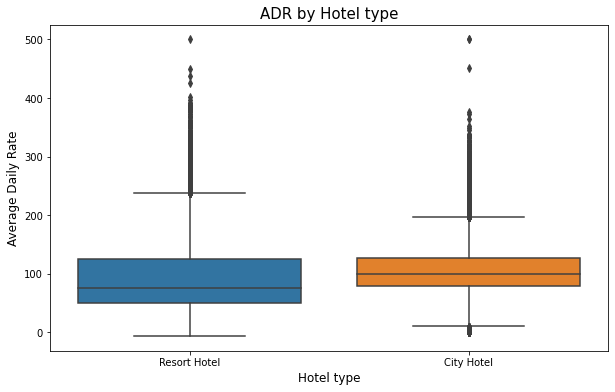

In [85]:
# Creating a box plot to visualize the ADR by hotel type
sns.boxplot(x='hotel', y='adr', data = hotel_booking)

# Giving title and labels to the box plot
plt.ylabel('Average Daily Rate', fontsize = 12)
plt.xlabel("Hotel type", fontsize = 12)
plt.title("ADR by Hotel type", fontsize = 15)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### There is more variance (spread) in the average daily rate (ADR) of Resort hotels as compared to City hotels. 


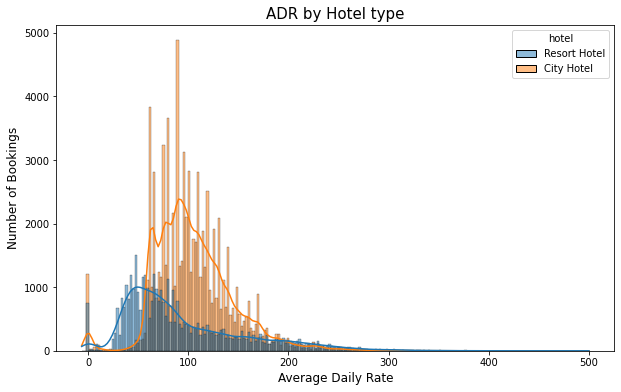

In [86]:
# Creating a histogram plot along with kernel density estimate (kde) to visualize the ADR by hotel type
sns.histplot(x = 'adr', hue = 'hotel', data = hotel_booking, kde = True)

# Giving title and labels to the plot
plt.xlabel('Average Daily Rate', fontsize = 12)
plt.ylabel('Number of Bookings', fontsize = 12)
plt.title("ADR by Hotel type", fontsize = 15)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### Let us group the hotels by type and check the variation of ADR across the different months in a year

In [87]:
# Performing groupby operation on 'hotel', 'arrival_date_month' and mean of 'adr'
adr_by_month = hotel_booking.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()

# Sorting the dataframe in sequential order of months 
adr_by_month['arrival_date_month'] = pd.Categorical(adr_by_month['arrival_date_month'], categories = months, ordered = True)
adr_by_month.sort_values('arrival_date_month', inplace = True)


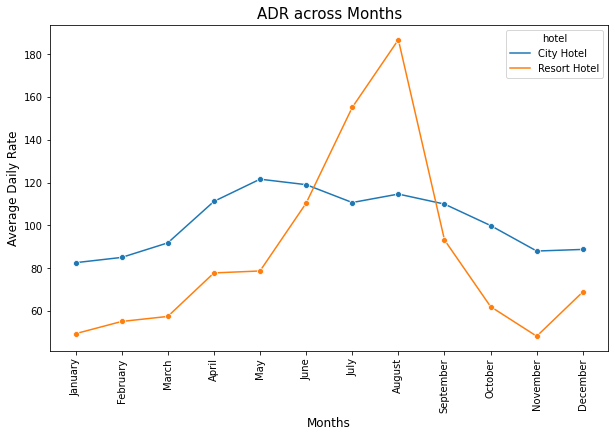

In [89]:
# Creating a simple line plot to visualize the change in ADR according to months and hotel type
sns.lineplot(x ='arrival_date_month', y ='adr', marker="o", hue ='hotel', data = adr_by_month)

# Giving title and labels to the plot
plt.title('ADR across Months', fontsize = 15)
plt.ylabel('Average Daily Rate', fontsize = 12)
plt.xlabel('Months', fontsize = 12)
p = plt.xticks(rotation=90)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


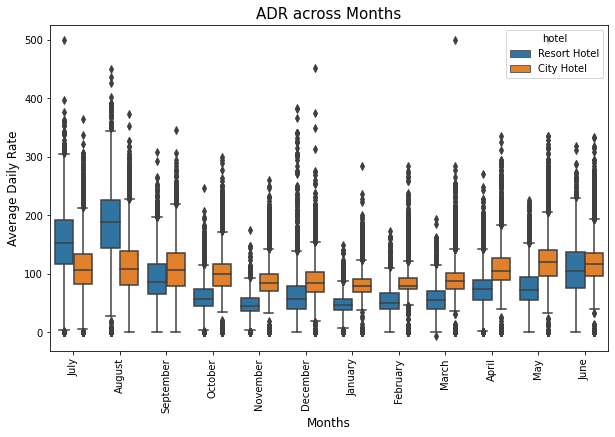

In [92]:
# Creating a box plot to visualize the change in ADR according to months and hotel type
sns.boxplot(x ='arrival_date_month', y ='adr', hue ='hotel', data = hotel_booking)

# Giving title and labels to the plot
plt.title('ADR across Months', fontsize = 15)
plt.ylabel('Average Daily Rate', fontsize = 12)
plt.xlabel('Months', fontsize = 12)
p = plt.xticks(rotation=90)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### The ADR for City hotels is roughy within the range 80-120 across all the months. The period beween April and September have higher daily rates in City hotels.

### There is high variation in the ADR of the Resort hotels. The ADR for Resort hotels shoots up in the months of July and August. 

### Let us check if there is any relation between ADR and lead time

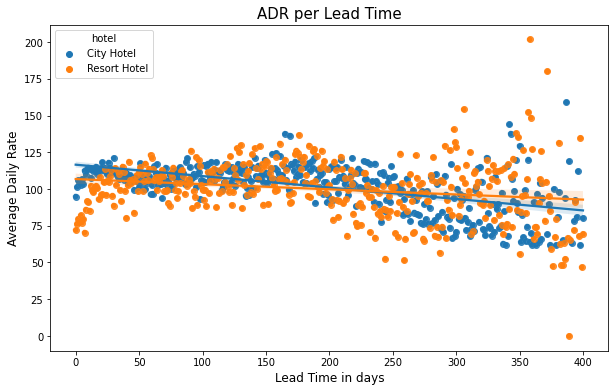

In [95]:
# Performing groupby operation on 'hotel', 'lead_time' and mean of 'adr'
adr_by_lead_time = hotel_booking.groupby(['hotel','lead_time'])['adr'].mean().reset_index()

# Creating a scatter plot to visualize the variation in ADR according to Lead time and Hotel type
sns.scatterplot(x ='lead_time', y ='adr', hue ='hotel', data = adr_by_lead_time)

# Drawing a regression line for relation between ADR and lead time for City Hotels and Resort Hotels separately
sns.regplot(x ='lead_time', y ='adr', data = adr_by_lead_time [adr_by_lead_time['hotel'] =='City Hotel'])
sns.regplot(x ='lead_time', y ='adr', data = adr_by_lead_time [adr_by_lead_time['hotel'] =='Resort Hotel'])

# Giving title and labels to the plot
plt.title('ADR per Lead Time', fontsize = 15)
plt.ylabel('Average Daily Rate', fontsize = 12)
plt.xlabel('Lead Time in days', fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### There is a slight downward trend in ADR as the lead time increases. The trend is relatively more pronounced for City Hotels than Resort Hotels.

### As the lead time increases, we see that the ADR varies much more for Resort hotels

### Let us check the ADR for different customer types



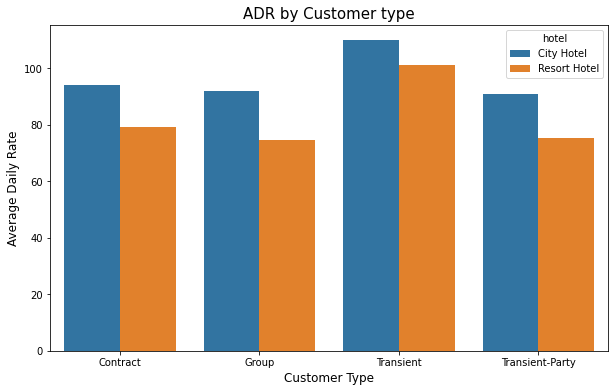

In [96]:
# Performing groupby operation on 'hotel', 'customer_type' and mean of 'adr'
adr_by_customer_type = hotel_booking.groupby(['hotel', 'customer_type'])['adr'].mean().reset_index()

# Creating a bar plot to visualize the mean ADR for different customer types
sns.barplot(x ='customer_type', y ='adr', hue ='hotel', data = adr_by_customer_type)

# Giving title and labels to the plot
plt.title('ADR by Customer type', fontsize = 15)
plt.ylabel('Average Daily Rate', fontsize = 12)
plt.xlabel('Customer Type', fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### ADR is the highest for Transient customers and lowest for Group customers.

### Let us also check the ADR for different Market segments and Distribution channels

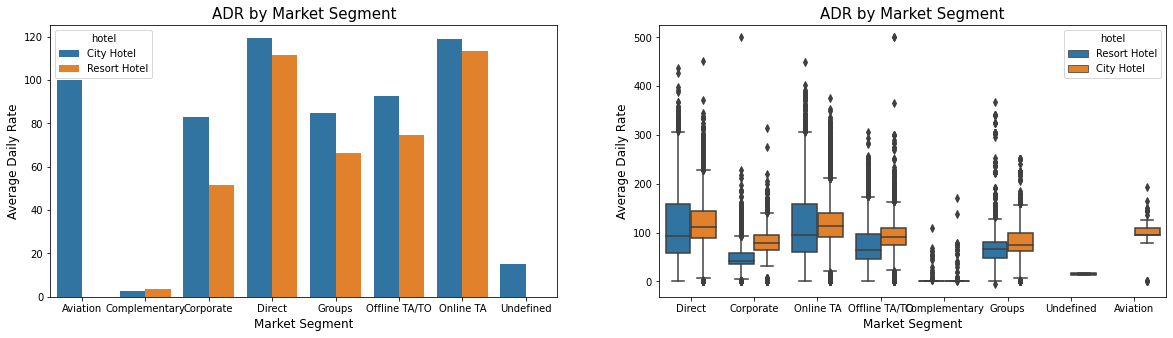

In [114]:
# Performing groupby operation on 'hotel', 'market_segment' and mean of 'adr'
adr_by_market_segment = hotel_booking.groupby(['hotel', 'market_segment'])['adr'].mean().reset_index()

# Setting axes to the subplots
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Creating a box plot and a bar plot to visualize the mean ADR according to market segment and hotel type
sns.barplot(x ='market_segment', y ='adr', hue ='hotel', data = adr_by_market_segment, ax = ax1)
sns.boxplot(x ='market_segment', y ='adr', hue ='hotel', data = hotel_booking, ax=ax2)

# Giving title and labels to the plots
ax1.set_title('ADR by Market Segment', fontsize = 15)
ax1.set_ylabel('Average Daily Rate', fontsize = 12)
ax1.set_xlabel('Market Segment', fontsize = 12)
ax2.set_title('ADR by Market Segment', fontsize = 15)
ax2.set_ylabel('Average Daily Rate', fontsize = 12)
ax2.set_xlabel('Market Segment', fontsize = 12)

plt.rcParams.update()


### The contribution to the highest ADR is from the Direct and the Online TA market segments
### The Corporate market segment brings in the lowest ADR for both Resort Hotels as well as City Hotels

Text(0.5, 0, 'Distribution Channel')

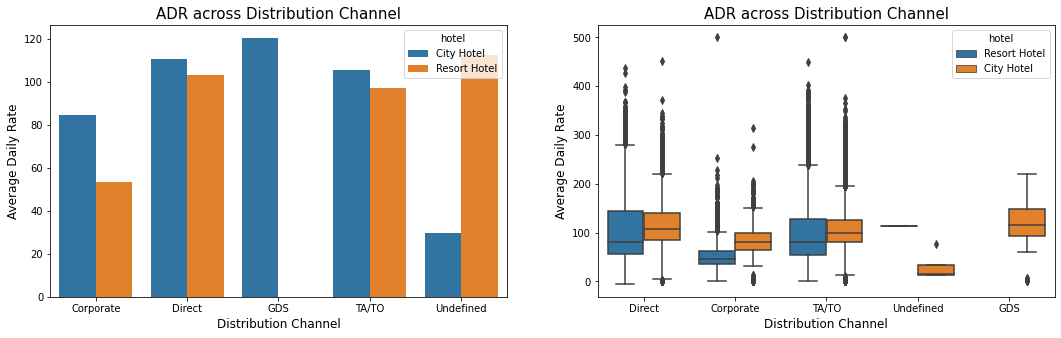

In [116]:
# Performing groupby operation on 'hotel','distribution_channel' and 'mean of 'adr'
adr_by_distribution_channel = hotel_booking.groupby(['hotel', 'distribution_channel'])['adr'].mean().reset_index()

# Setting axes to the subplots
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18,5))

# Creating a bar plt and box plot to visualize the mean ADR according to distribution channel and hotel type
sns.barplot(x ='distribution_channel', y ='adr', hue ='hotel', data = adr_by_distribution_channel, ax = ax1)
sns.boxplot(x ='distribution_channel', y ='adr', hue ='hotel', data = hotel_booking, ax=ax2)

# Giving title and labels to the plots
ax1.set_title('ADR across Distribution Channel', fontsize = 15)
ax1.set_ylabel('Average Daily Rate', fontsize = 12)
ax1.set_xlabel('Distribution Channel', fontsize = 12)
ax2.set_title('ADR across Distribution Channel', fontsize = 15)
ax2.set_ylabel('Average Daily Rate', fontsize = 12)
ax2.set_xlabel('Distribution Channel', fontsize = 12)


### The ADR for Resort Hotels is the highest for bookings made through the GDS (global distribution system)
### The direct distribution channel fetches better ADR than TA/TO for both City and Resort hotels
### Bookings made through the Corporate distribution channel has the lowest ADR



### Let us check the ADR according to the assigned room types

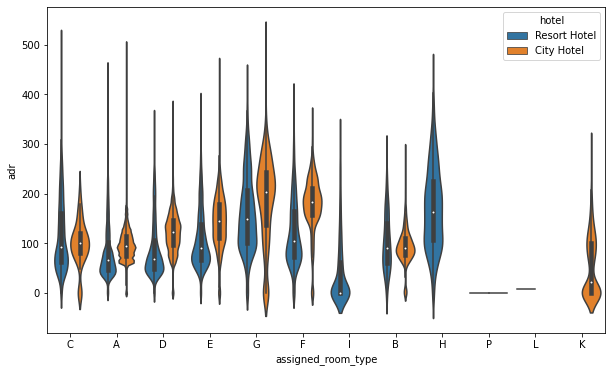

In [93]:
# Creating a violin plot to visualize the ADR according to assigned room type
sns.violinplot(x ='assigned_room_type', y ='adr', hue ='hotel', data = hotel_booking)

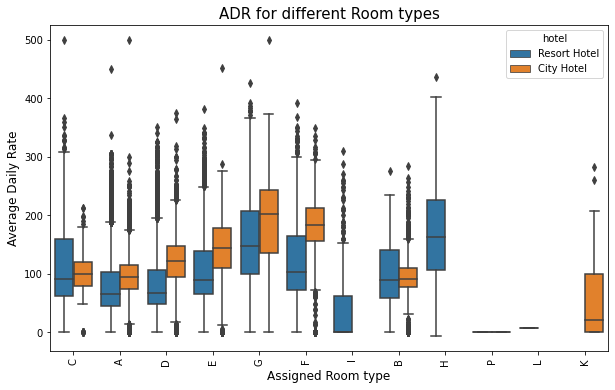

In [117]:
# Creating a box plot to visualize the ADR for the assigned room types
sns.boxplot(x ='assigned_room_type', y ='adr', hue ='hotel', data = hotel_booking)

# Giving title and labels to the plot
plt.title('ADR for different Room types', fontsize = 15)
plt.ylabel('Average Daily Rate', fontsize = 12)
plt.xlabel('Assigned Room type', fontsize = 12)
p = plt.xticks(rotation=90)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

###The room types H and G had the highest ADR in Resort Hotels
###The room types G and F had the highest ADR in City Hotels

## <b> Duration of Stay

### Let us check if there is any effect of number of days stayed in hotel on the ADR

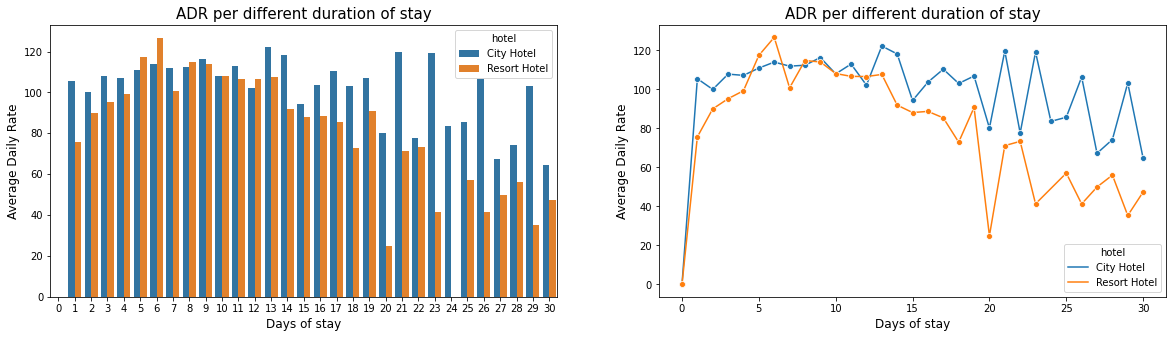

In [125]:
# Performing groupby operation on 'hotel', 'total_stay' and mean of 'adr
adr_total_stay = hotel_booking.groupby(['hotel','total_stay'])['adr'].mean().reset_index()

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Creating a bar and a line plot to visualize the variation in ADR according to number of days of hotel stay and hotel type
sns.barplot(x ='total_stay', y ='adr', hue ='hotel', data = adr_total_stay, ax = ax1)
sns.lineplot(x ='total_stay', y ='adr', hue ='hotel', marker = 'o', data = adr_total_stay, ax =ax2)

# Giving title and labels to the plot
ax1.set_title('ADR per different duration of stay', fontsize = 15)
ax1.set_ylabel('Average Daily Rate', fontsize = 12)
ax1.set_xlabel('Days of stay', fontsize = 12)
ax2.set_title('ADR per different duration of stay', fontsize = 15)
ax2.set_ylabel('Average Daily Rate', fontsize = 12)
ax2.set_xlabel('Days of stay', fontsize = 12)

# Setting the display figure size using rcParams method 
#plt.rcParams['figure.figsize'] = (10, 6)

plt.rcParams.update()

### The ADR did not vary much with increase in the duration of stay in City Hotels

### The ADR for Resort hotels increased as the number of days increased from 1 to upto 6 days. Beyond 7 days, the ADR begins to fall and beyond 2 weeks of stay, the ADR falls rather steeply for Resort Hotels

### Let us also check for variation in ADR if the booking was made for stay during weekend.

In [126]:
# Creating a categorical column to indicate if weekend or not

# Assigning the values of the column 'stays_in_weekend_nights' to the new column 'if_weekend'
hotel_booking['if_weekend'] = hotel_booking['stays_in_weekend_nights']

# Assigning the value of 1 if the days of stay in weekend nights is greater than 0
hotel_booking.loc[hotel_booking.if_weekend > 0, 'if_weekend'] = 1


In [127]:
# Performing groupby operation on 'hotel', 'if_weekend' and mean of 'adr

adr_by_weekend = hotel_booking.groupby(['hotel', 'if_weekend'])['adr'].mean().reset_index()
adr_by_weekend

,hotel,if_weekend,adr
0,City Hotel,0,103.267428
1,City Hotel,1,107.041864
2,Resort Hotel,0,84.305785
3,Resort Hotel,1,100.786971


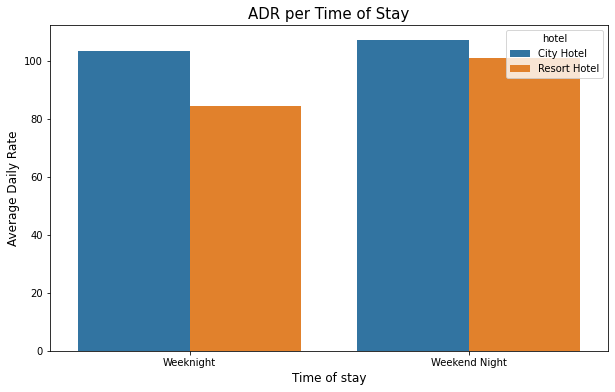

In [128]:
# Creating a bar plot to visualize the mean ADR vis-a-vis stay during weekend or weeknight
sns.barplot(x ='if_weekend', y ='adr', hue ='hotel', data = adr_by_weekend)

# Giving title and labels to the plot
plt.title('ADR per Time of Stay', fontsize = 15)
plt.ylabel('Average Daily Rate', fontsize = 12)
plt.xlabel('Time of stay', fontsize = 12)
plt.xticks(ticks = [0.0, 1.0], labels = ['Weeknight', 'Weekend Night'], rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### The ADR is more or less similar during weeknights and weekend nights for City Hotels.

### There is significant increase in ADR of Resort Hotels for stay in weekend nights (100.8) as against weeknights (84.3).

## <b> Total Guests

### Now, Let us see the details of Guests' stay in the Hotels. 

### Let us begin by checking the total guests per booking for each Hotel type

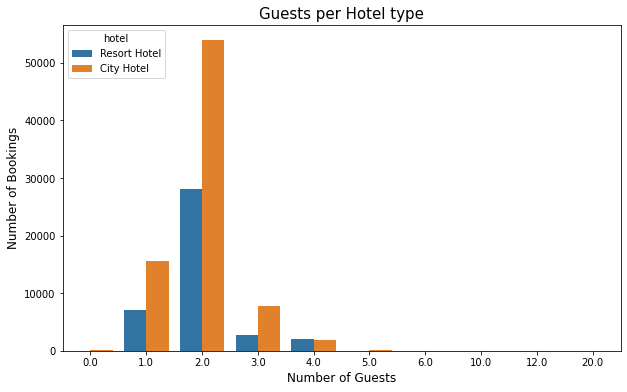

In [142]:
# Plotting the total guests per Hotel booking
sns.countplot(x ='total_guests', hue = 'hotel', data = hotel_booking)

# Giving title and labels to the plot
plt.title('Guests per Hotel type', fontsize = 15)
plt.ylabel('Number of Bookings', fontsize = 12)
plt.xlabel('Number of Guests', fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### 68% of the bookings in City Hotels and 70% of the bookings in Resort Hotels include two guests. 
### Solo travellers come next, with 20% of the bookings in City Hotels and 17.5% of bookings in Resort Hotels.
### 3 and 4 guests make up for 12 % of bookings in both City Hotels and Resort Hotels
### Bookings with 4 guests are evenly divided between City Hotels and Resort Hotels

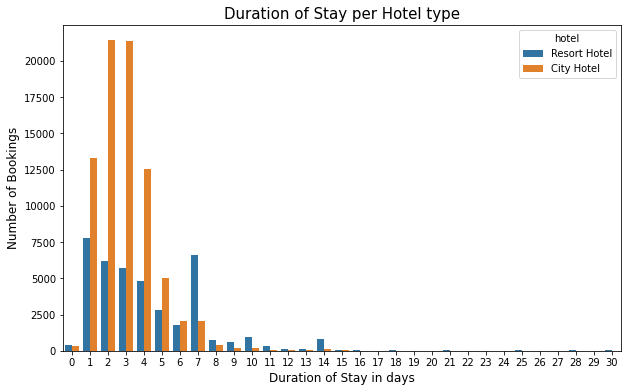

In [146]:
# Plotting the total duration of guests' stay per Hotel type
sns.countplot(x ='total_stay', hue = 'hotel', data = hotel_booking)

# Giving title and labels to the plot
plt.title('Duration of Stay per Hotel type', fontsize = 15)
plt.ylabel('Number of Bookings', fontsize = 12)
plt.xlabel('Duration of Stay in days', fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### The most popular duration of stay is 2-3 days in City Hotels, followed by 1 and 4 days
### For the Resort Hotels, the most popular is a one day stay

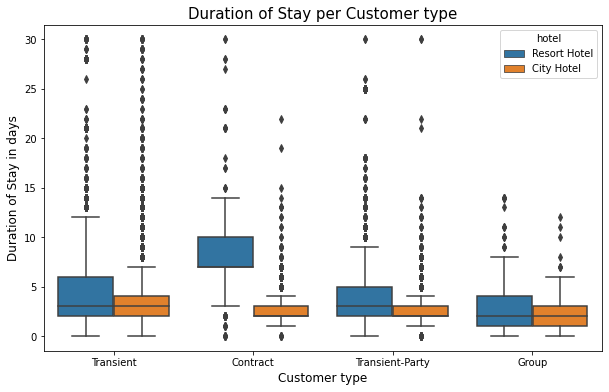

In [149]:
# Creating a box plot to visualize the duration of stay in the hotel per customer type
sns.boxplot(x = "customer_type", y = "total_stay", hue = "hotel", data = hotel_booking)

# Giving title and labels to the plot
plt.title('Duration of Stay per Customer type', fontsize = 15)
plt.ylabel('Duration of Stay in days', fontsize = 12)
plt.xlabel('Customer type', fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### The Contract customers have stayed for the longest duration of time in Resort Hotels

### Guests from across all the customer types have stayed longer at Resort Hotels than in City Hotels

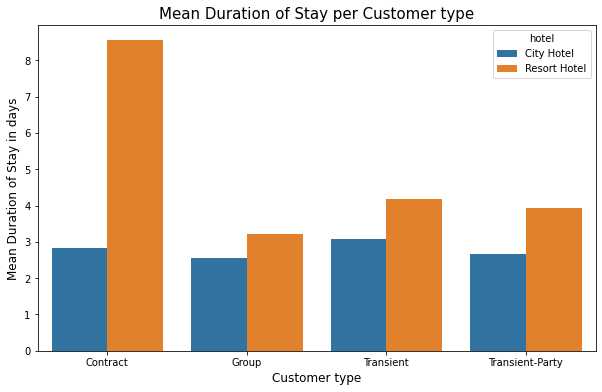

In [151]:
# Performing groupby operation on hotel type, customer type and the mean of total stay
stay_by_customer_type = hotel_booking.groupby(['hotel','customer_type'])['total_stay'].mean().reset_index()

# Creating a bar plot to visualize the average duration of stay per customer type
sns.barplot(x ='customer_type', y ='total_stay', hue ='hotel', data = stay_by_customer_type)

# Giving title and labels to the plot
plt.title('Mean Duration of Stay per Customer type', fontsize = 15)
plt.ylabel('Mean Duration of Stay in days', fontsize = 12)
plt.xlabel('Customer type', fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### The mean duration of stay has been roughly similar (2-3 days) across the different customer types for City Hotels

### The mean duration of stay in Resort Hotels by different customer types, ranged between 3 and 8 days

## <b> Reservation Status

### Let us find the Reservation Status of the bookings

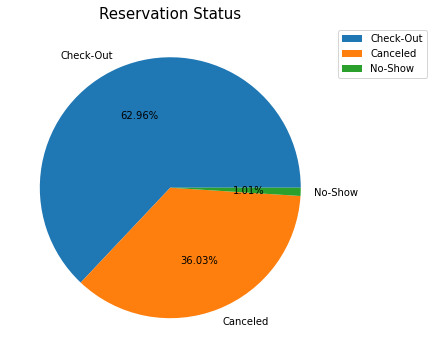

In [152]:
# Finding the value count of 'reservation_status'
booking_status = hotel_booking['reservation_status'].value_counts()

# Plotting a Pie Chart to show bookings by various market segments
plt.pie(booking_status,labels = booking_status.index, autopct = "%.02f%%")

# Giving a title and legend to the plot
plt.title("Reservation Status", fontsize = 15)
plt.legend(loc ='centre right', bbox_to_anchor = (1, 0,0, 1))

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### 63% of the guests have checked out of the hotels.

### 36% of the hotel reservations were cancelled and the guests didnot show up for 1% of the bookings

## <b> Repeat Guests

### Let us check the number of bookings by repeat guests.

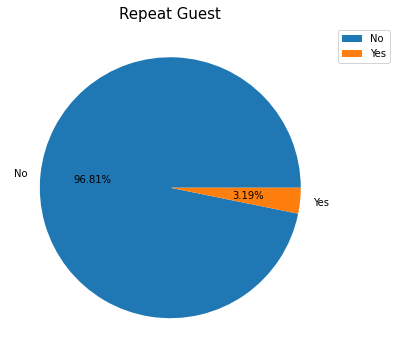

In [154]:
# Finding the value count of repeat guests
repeat_guest = hotel_booking['is_repeated_guest'].value_counts()

# Plotting a Pie Chart to show bookings by repeat guests
p = plt.pie(repeat_guest, labels = ['No', 'Yes'], autopct = "%.02f%%")

# Giving a title and legend to the plot
plt.title("Repeat Guest", fontsize = 15)
plt.legend( loc ='centre right', bbox_to_anchor = (1, 0,0, 1))

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### Only 3% of the bookings were made by repeat guests

In [155]:
#Grouping the 'hotel' by type and whether the booking is by repeat guest

repeat_guest_by_hotel = hotel_booking.groupby(['hotel'])['is_repeated_guest'].value_counts(normalize = True).unstack()
repeat_guest_by_hotel

is_repeated_guest,0,1
hotel,,
City Hotel,0.974385,0.025615
Resort Hotel,0.955617,0.044383


### 2.5% of the bookings in City Hotels were made by repeat guests

### 4.4% of the bookings in Resort Hotels were made by repeat guests


In [156]:
#Grouping the customer by type and whether the customer is a repeat guest

repeat_by_customer_type = hotel_booking.groupby(['customer_type'])['is_repeated_guest'].value_counts(normalize = True).unstack()
repeat_by_customer_type

is_repeated_guest,0,1
customer_type,,
Contract,0.991904,0.008096
Group,0.720971,0.279029
Transient,0.965708,0.034292
Transient-Party,0.978387,0.021613


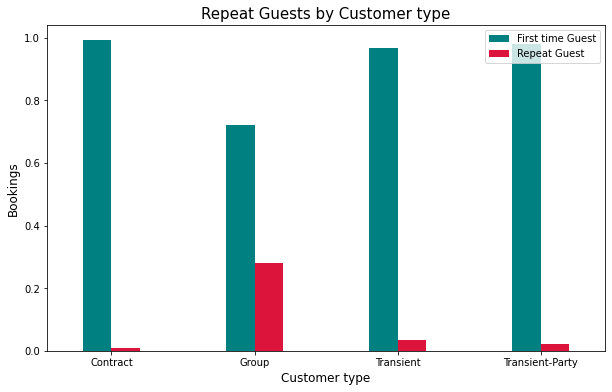

In [157]:
# Bar plot to visualize the type of customer who is a repeat guest
repeat_by_customer_type.plot( kind ='bar', width = 0.4, color = ['teal','crimson'])

# Giving labels and legend to the plot
plt.title('Repeat Guests by Customer type', fontsize = 15)
plt.ylabel('Bookings', fontsize = 12)
plt.xlabel('Customer type', fontsize = 12)
plt.legend(labels = ['First time Guest','Repeat Guest'])
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### About 28% of the Group customers are repeat guests

###3.4% of Transient and 2.1% of Transient Party customers are repeat guests

### A negligible 0.8% of the Contract customers are repeat guests

##<b> Special Requests

### Let us first check the number of special requests received per Hotel type.

---



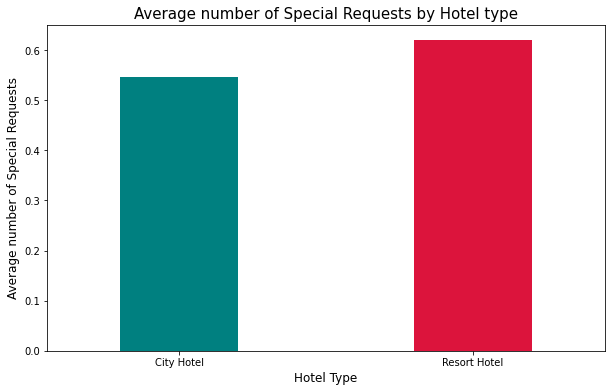

In [158]:
# Using groupby to group hotels by type and find the mean of special requests received by each hotel type
spl_request_by_hotel = hotel_booking.groupby("hotel")['total_of_special_requests'].mean()

# Bar plot to visualize the mean of special requests received by hotel type
spl_request_by_hotel.plot( kind ='bar', width = 0.4, color = ['teal','crimson'])

# Giving labels and legend to the plot
plt.title("Average number of Special Requests by Hotel type", fontsize = 15)
plt.xlabel("Hotel Type", fontsize = 12)
plt.ylabel("Average number of Special Requests", fontsize = 12)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### On an average, Resort Hotels have received more Special Requests than City Hotels

### Let us now see the number of special requests received from guests based on their countries of origin

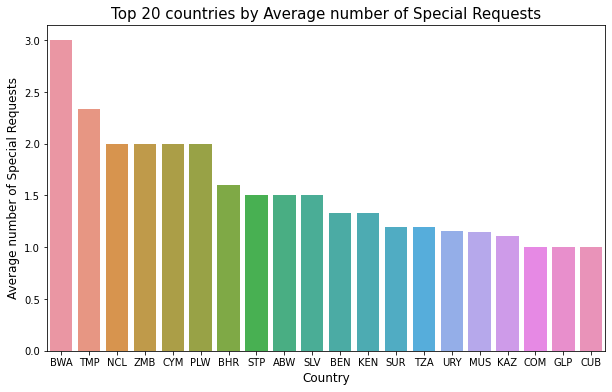

In [159]:
# Using groupby to group countries by type and find the mean of special requests received from each country, sorted by top 20
spl_request_by_country = hotel_booking.groupby("country")['total_of_special_requests'].mean().sort_values(ascending=False)[:20]

# Bar plot to visualize the mean of special requests received from different countries
sns.barplot(x=spl_request_by_country.index, y=spl_request_by_country)

#Giving title and labels to the plot
plt.title("Top 20 countries by Average number of Special Requests", fontsize = 15)
plt.xlabel("Country",fontsize = 12)
plt.ylabel("Average number of Special Requests", fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### Guests from Botswana, East Timor, New Caledonia, Zambia and Cayman Islands are among those who made the most special requests.

### Let us see the number of special requests received from different customer types

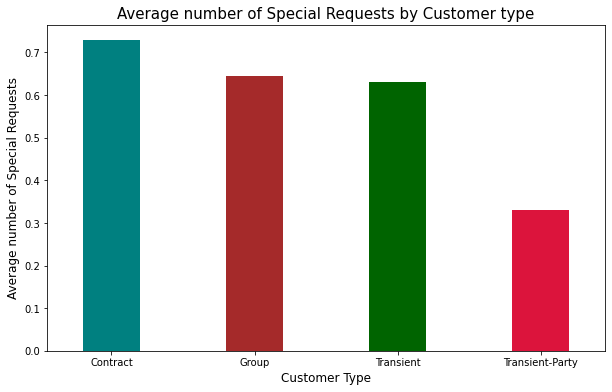

In [161]:
# Using groupby to group customers by type and find the mean of special requests received from each customer type
spl_request_by_customer = hotel_booking.groupby("customer_type")['total_of_special_requests'].mean()

# Bar plot to visualize the mean of special requests received from different customer types
spl_request_by_customer.plot( kind ='bar', width = 0.4, color = ['teal','brown','darkgreen','crimson'])

# Giving labels and legend to the plot
plt.title("Average number of Special Requests by Customer type", fontsize = 15)
plt.xlabel("Customer Type", fontsize = 12)
plt.ylabel("Average number of Special Requests", fontsize = 12)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### More special requests were made by Customers of Contract type followed by Group and Transient Customers.

### Let us now check if there is any relation between guests travelling with children and number of special requests made



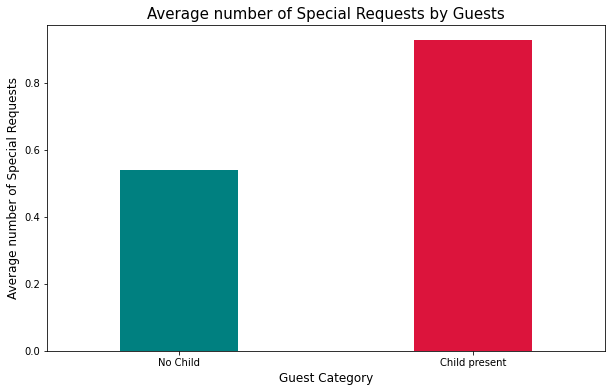

In [163]:
# Using groupby to group guests travelling with children and find the mean of special requests received from them
spl_request_if_child = hotel_booking.groupby("if_child")['total_of_special_requests'].mean()

# Bar plot to visualize the mean of special requests received from guests travelling with children
spl_request_if_child.plot( kind ='bar', width = 0.4, color = ['teal','crimson'])

# Giving labels and legend to the plot
plt.title("Average number of Special Requests by Guests", fontsize = 15)
plt.xlabel("Guest Category", fontsize = 12)
plt.ylabel("Average number of Special Requests", fontsize = 12)
plt.xticks([0.0,1.0], labels = ['No Child', 'Child present'], rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### As expected, guests travelling with children have made more special requests

### Let us check if there is any relation between repeat guests and special requests

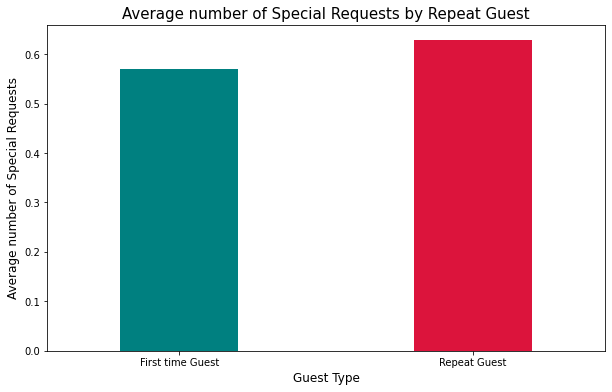

In [164]:
# Using groupby to group repeat guests and find the mean of special requests received from them
spl_request_by_repeat_guest = hotel_booking.groupby("is_repeated_guest")['total_of_special_requests'].mean()

# Bar plot to visualize the mean of special requests received from repeat guests
spl_request_by_repeat_guest.plot( kind ='bar', width = 0.4, color = ['teal','crimson'])

# Giving labels and legend to the plot
plt.title("Average number of Special Requests by Repeat Guest", fontsize = 15)
plt.xlabel("Guest Type", fontsize = 12)
plt.ylabel("Average number of Special Requests", fontsize = 12)
plt.xticks([0,1], labels = ['First time Guest','Repeat Guest'], rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### Repeat Guests only make marginally more special requests than first time guests

### Let us check if there is any relation between lead time and special requests.

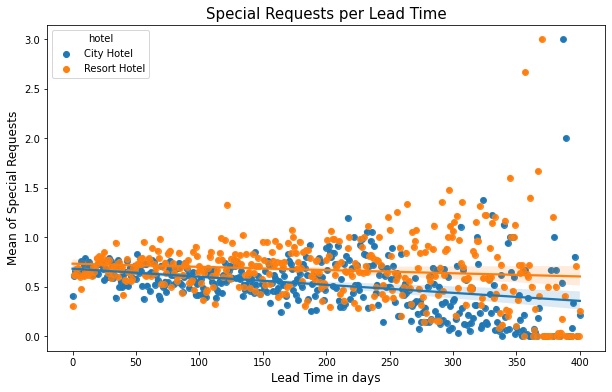

In [165]:
# Grouping the bookings by hotel type, lead time and the mean of special requests
spl_requests_by_lead_time = hotel_booking.groupby(['hotel','lead_time']).agg({'total_of_special_requests': 'mean'}).reset_index()

# Drawing a Scatterplot to show the mean number of special requests received per lead time
sns.scatterplot(x='lead_time', y='total_of_special_requests', hue='hotel', data = spl_requests_by_lead_time)

# Plotting a regression line to show the mean number of special requests received per lead time for City Hotels and Resort Hotels separately
sns.regplot(x='lead_time', y='total_of_special_requests', data=spl_requests_by_lead_time[spl_requests_by_lead_time['hotel']=='City Hotel'])
sns.regplot(x='lead_time', y='total_of_special_requests', data=spl_requests_by_lead_time[spl_requests_by_lead_time['hotel']=='Resort Hotel'])

# Giving title and labels to the plot
plt.title("Special Requests per Lead Time", fontsize = 15)
plt.ylabel('Mean of Special Requests', fontsize = 12)
plt.xlabel('Lead Time in days', fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### There is a slight negative relation between lead time and the number of special requests. The negative correlation seems more pronounced for City Hotels than Resort Hotels. Higher variance can be seen in the data for Resort Hotels

## <b> Booking Changes

### Next, let us check the number of booking changes in general, and by hotel type

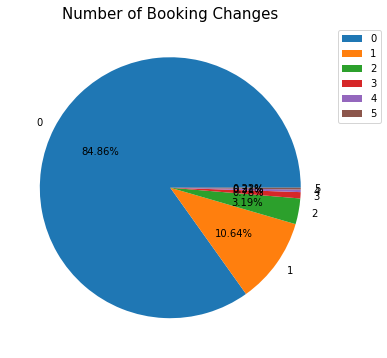

In [166]:
# Finding the value count of booking changes
num_booking_changes = hotel_booking['booking_changes'].value_counts(normalize = True)

# Plotting a Pie Chart to show the number of booking changes
plt.pie(num_booking_changes, labels = num_booking_changes.index, autopct = "%.02f%%")

# Giving a title and legend to the plot
plt.title("Number of Booking Changes", fontsize = 15)
plt.legend(loc ='centre right', bbox_to_anchor = (1, 0,0, 1))

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### 85% of the hotel bookings had no changes. 11% of the bookings had 1 change and 3% of the booking had 2 changes. 1% of the bookings had 3 or more changes

In [167]:
# Grouping hotels by type and finding the value count of booking changes per hotel type

booking_changes_by_hotel = hotel_booking.groupby(['hotel'])['booking_changes'].value_counts(normalize = True).unstack()
booking_changes_by_hotel

booking_changes,0,1,2,3,4,5
hotel,,,,,,
City Hotel,0.870566,0.091163,0.028287,0.005887,0.002445,0.001651
Resort Hotel,0.805092,0.136520,0.038967,0.011483,0.004543,0.003395


### In City Hotels, there were no booking changes for 87% of the bookings. 9% of the bookings had 1 change and 4% of the bookings had 2 or more booking changes

### In Resort Hotels, there were no changes for 80% of the bookings. 13.65% of the bookings had 1 change and 3.8% of the bookings had 2 changes

## <b> Requirement of Car Parking Space

### Let us also check the demand for Car parking space

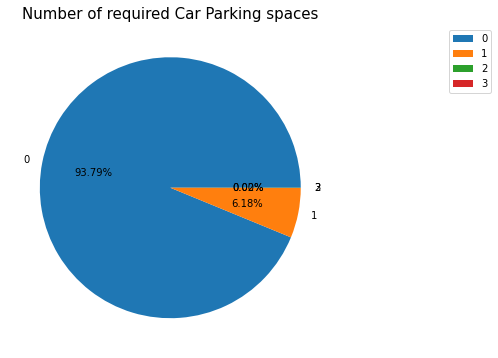

In [168]:
# Finding the value count of the unique values in 'required_car_parking_spaces'
required_car_parking = hotel_booking['required_car_parking_spaces'].value_counts()

# Plotting a Pie Chart to show preference for room type
plt.pie(required_car_parking, labels = required_car_parking.index, autopct = "%.2f%%")

# Giving a title and legend to the plot
plt.title("Number of required Car Parking spaces", fontsize = 15)
plt.legend(loc ='top right', bbox_to_anchor = (1, 0, 0.5, 1))

# Setting the display figure size 
plt.rcParams['figure.figsize'] = (10, 6)

### Majority of Hotel bookings (93.79%) didnot require a car parking space

### 6.18% of the bookings required 1 car parking space

### 0.03% of the bookings required 2 or more car parking spaces

## <b> Days in Waiting List

### Let us find the average days in waiting list before the booking is confirmed.

In [153]:
# Grouping the hotels by type to find the mean wait_time for each of the hotel types  

mean_wait_time = hotel_booking.groupby(['hotel'], as_index = False).agg({'days_in_waiting_list':"mean"})
mean_wait_time

,hotel,days_in_waiting_list
0,City Hotel,3.010677
1,Resort Hotel,0.527758


### The mean waiting time for bookings in City Hotels is 3 days while the wait time for Resort Hotels is less than a day

### Let us find, bookings through which distribution channel results in a longer waiting period

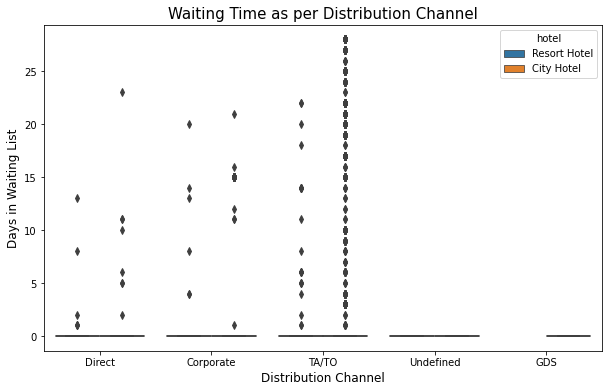

In [172]:
# Creating a subset of the original dataframe with only those observations whose 'days_in_waiting_list' is less than 30
# This is done to get a clearer view of the plot as 'days_in_waiting_list' has too many unique values beyond its mean and median
df_wait = hotel_booking[ hotel_booking['days_in_waiting_list'] < 30]

# Drawing a box plot to check the days in waiting period as per the distribution channel used for bookings
sns.boxplot(x = 'distribution_channel', y = 'days_in_waiting_list', hue ='hotel' , data= df_wait)

# Giving title and labels to the plot
plt.title("Waiting Time as per Distribution Channel", fontsize = 15)
plt.xlabel("Distribution Channel", fontsize = 12)
plt.ylabel("Days in Waiting List", fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

Bookings made through the TA/TO distribution channel have the longest wait times

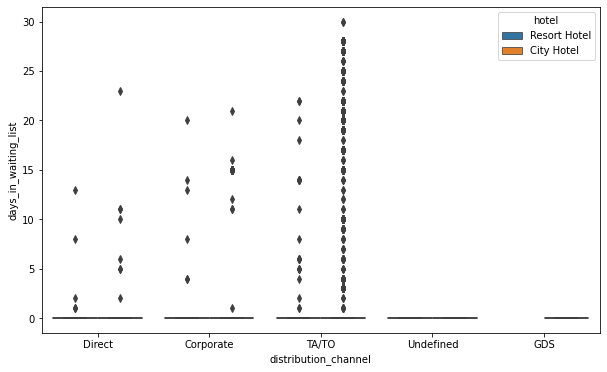

### Let us check if there is any relation between wait period and booking cancellations

In [173]:
# Grouping the 'is_cancelled' observations and hotel type with the mean of 'days_in_waiting_list'

waiting_time_of_cancelled = hotel_booking.groupby(['is_canceled','hotel'])['days_in_waiting_list'].mean().reset_index()
waiting_time_of_cancelled

,is_canceled,hotel,days_in_waiting_list
0,0,City Hotel,2.028035
1,0,Resort Hotel,0.694934
2,1,City Hotel,4.382968
3,1,Resort Hotel,0.092789


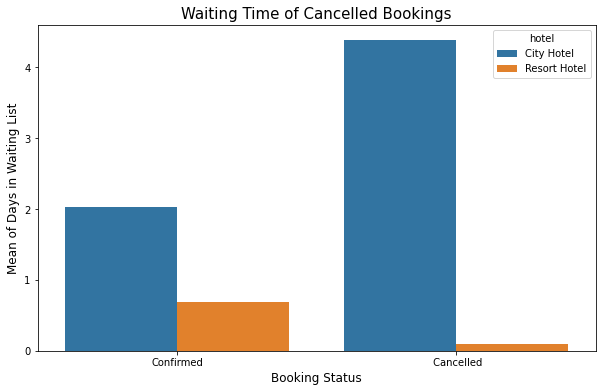

In [174]:
# Bar plot to show the relation between cancelled bookings and waiting time
sns.barplot(x ='is_canceled', y = 'days_in_waiting_list', hue = 'hotel', data = waiting_time_of_cancelled)

# Giving title and labels to the plot
plt.title("Waiting Time of Cancelled Bookings", fontsize = 15)
plt.xlabel("Booking Status", fontsize = 12)
plt.xticks([0,1], labels = ['Confirmed',' Cancelled'])
plt.ylabel("Mean of Days in Waiting List", fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### Bookings that were cancelled had a higher wait time

## <b> Type of Room Reserved

### Let us check details about the type of room reserved.


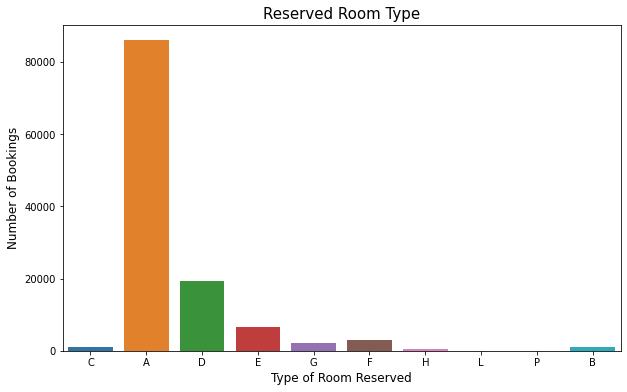

In [175]:
# Plotting the count of the 'reserved_room_type'
sns.countplot(x='reserved_room_type', data = hotel_booking)

# Giving a title and legend to the plot
plt.title("Reserved Room Type", fontsize = 15)
plt.xlabel('Type of Room Reserved', fontsize = 12)
plt.ylabel('Number of Bookings', fontsize = 12)

# Setting the display figure size 
plt.rcParams['figure.figsize'] = (10, 6)


### Majority of the guests prefered to book rooms of type A (72%). Room types D (16%) and E (5%) have a distant second and third preference respectively.

### Let us see if the room that is assigned is the same as the reserved room.

In [176]:
# Defining a function to check if the assigned room is the same as reserved room

def check_room_allotment(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

# Creating a new categorical column 'if_different_room_assigned' 
# Using lambda function to apply the defined function: 'check_room_allotment' and fill values in 'if_different_room_assigned'

hotel_booking['if_different_room_assigned'] = df.apply(lambda x : check_room_allotment(x), axis = 1)


In [177]:
# Grouping the 'hotel' by type and 'if_different_room_assigned' to find its value count per hotel type
room_allotment_by_hotel = hotel_booking.groupby(['hotel'])['if_different_room_assigned'].value_counts(normalize = True).unstack()
room_allotment_by_hotel


if_different_room_assigned,0,1
hotel,,
City Hotel,0.909341,0.090659
Resort Hotel,0.807164,0.192836


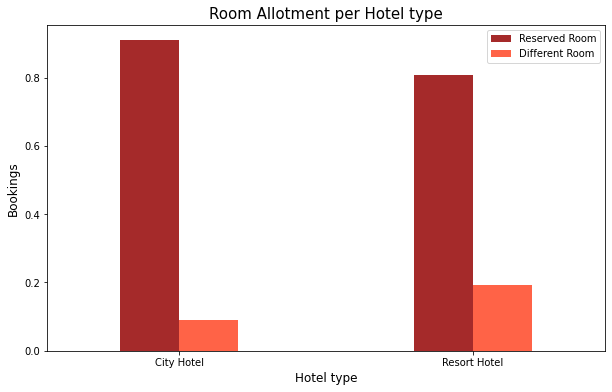

In [179]:
# Bar plot to show if the reserved room is alloted or not in each Hotel type
room_allotment_by_hotel.plot( kind='bar', width = 0.4, color=['brown', 'tomato'])

# Giving title and labels to the plot
plt.title("Room Allotment per Hotel type", fontsize = 15)
plt.xlabel("Hotel type", fontsize = 12)
plt.xticks(rotation='horizontal')
plt.ylabel("Bookings", fontsize = 12)
plt.legend(['Reserved Room','Different Room'])

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### About 20% of the rooms assigned at Resort Hotels are different than the ones reserved by the guests. In the City Hotels, this happened only 9% of the time

### Let us check if the difference in room allotment is a factor in booking cancellations.

In [180]:
# Performing groupby operation on 'if_different_room_assigned' along with the sum(count) of all cancelled bookings and count of hotel bookings
cancelled_if_different_room = hotel_booking.groupby('if_different_room_assigned').agg({'is_canceled':'sum', 'hotel':'count'}).reset_index()

# Renaming the columns in the new dataframe 'cancelled_if_different_room
cancelled_if_different_room.rename(columns = {'is_canceled' : 'cancelled_bookings', 'hotel' : 'total_bookings'}, inplace = True)

# Creating a new column 'cancellation_percentage' to store the percentages of cancelled bookings per different room allotment
cancelled_if_different_room['cancellation_percentage'] = round((cancelled_if_different_room['cancelled_bookings'] / cancelled_if_different_room['total_bookings']) *100, 2)
cancelled_if_different_room


,if_different_room_assigned,cancelled_bookings,total_bookings,cancellation_percentage
0,0,43422,104473,41.56
1,1,802,14917,5.38


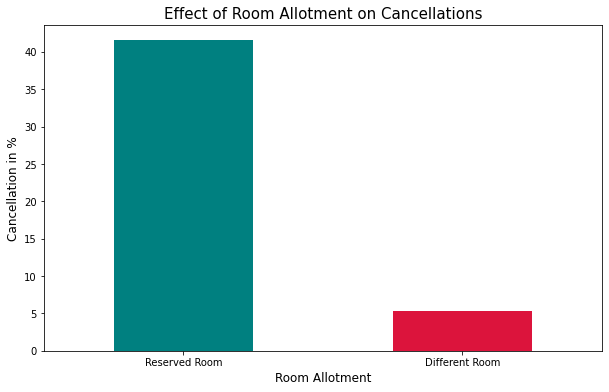

In [181]:
# Barplot showing the cancellation percentage per type of room allotment
cancelled_if_different_room.plot(kind ='bar', x ='if_different_room_assigned', y='cancellation_percentage', color =['teal','crimson'], legend=False)

# Giving title and labels to the plot
plt.title("Effect of Room Allotment on Cancellations", fontsize = 15)
plt.xlabel("Room Allotment", fontsize = 12)
plt.xticks([0,1], labels = ['Reserved Room','Different Room'], rotation='horizontal')
plt.ylabel("Cancellation in %", fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### Only 5.4% of the bookings in which a different room was assigned, had cancellations. Bookings which had the same room assigned as the one reserved, had 41.5% cancellations

### So, allotment of a different room than one reserved, is not a very important factor to influence cancellation